# EDA (Exploratory Data Analysis):

### In this section, we will focus on EDA. This Python notebook is designed to present the data we collected and handled visually, using multiple Python's libraries (such as matplotlib and seaborn), in order to draw conclusions that will help us answer our research question and help us in the machine learning phase.

**Written by: Nadav Bitran Numa and Maor Bezalel**

## Preceding Step - import modules (packages)
This step is necessary in order to use external packages.

**Using the following libraries:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import seaborn as sb
from numerize import numerize
%matplotlib inline

## Loading our datasets

In [2]:
# Main dataset
nadlan_cities_df = pd.read_csv("AllCities (After Handling).csv")
# Secondary datasets
nadlan_environmental_mean_df = pd.read_csv("AllCitiesEnvironment (AverageFill).csv")
nadlan_environmental_median_df = pd.read_csv("AllCitiesEnvironment (MedianFill).csv")

In [3]:
nadlan_cities_df.Property_Type = nadlan_cities_df.Property_Type.astype('category')

nadlan_cities_df['Building_Number'] = pd.to_numeric(nadlan_cities_df['Building_Number'])
nadlan_cities_df.Building_Number = nadlan_cities_df.Building_Number.astype('int32')

nadlan_cities_df['Rooms'] = pd.to_numeric(nadlan_cities_df['Rooms'])
nadlan_cities_df.Rooms = nadlan_cities_df.Rooms.astype("float32")

nadlan_cities_df['Floor'] = pd.to_numeric(nadlan_cities_df['Floor'])
nadlan_cities_df.Floor = nadlan_cities_df.Floor.astype("int32")

nadlan_cities_df['Square_Meter'] = pd.to_numeric(nadlan_cities_df['Square_Meter'])
nadlan_cities_df.Square_Meter = nadlan_cities_df.Square_Meter.astype("float32")

nadlan_cities_df['Price'] = pd.to_numeric(nadlan_cities_df['Price'])
nadlan_cities_df.Price = nadlan_cities_df.Price.astype('int32')

nadlan_cities_df['Sale_Date'] = pd.to_datetime(nadlan_cities_df['Sale_Date'],format='%Y-%m-%d')

nadlan_cities_df.reset_index(drop=True,inplace=True)

# Step 0: EDA - Prologue

In this section we will examine our handled data through a comprehensive visual presentation.

This will be done in order to get a general assessment of the total data in our possession, 

which will help us decide which more focused visual presentations to make in the next steps.

## 0.1: Visual presentation of the number of housing units in each city

### Table:

In [4]:
cities_len_dict = {city[::-1]:len(nadlan_cities_df[nadlan_cities_df["City"] == city]) for city in nadlan_cities_df["City"].unique()}
cities_len_df = pd.DataFrame({"City":cities_len_dict.keys(), "Number_Of_Housing_Units":cities_len_dict.values()})
cities_len_df = cities_len_df.sort_values(by=['Number_Of_Housing_Units'],ascending=False)
cities_len_df.reset_index(drop=True,inplace=True)

### Pie Chart:

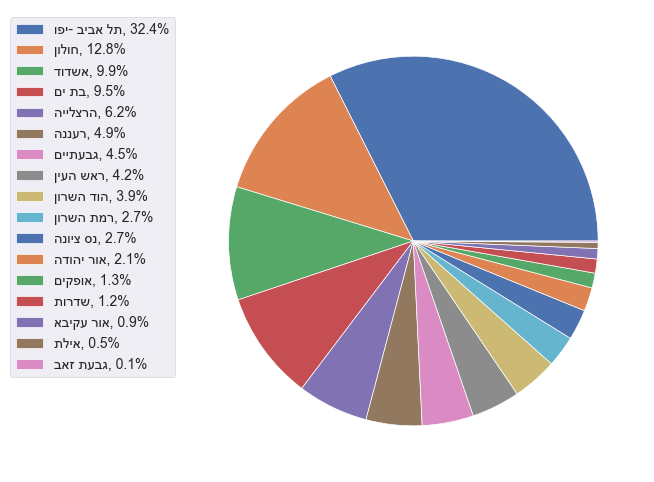

In [30]:
# Creating a pie chart
figure = plt.figure(figsize = (6,6))
ax = plt.gca()
labels = list(cities_len_df["City"][:])
sizes = list(cities_len_df["Number_Of_Housing_Units"])

plt.pie(cities_len_df["Number_Of_Housing_Units"])
ax.legend(labels=['%s, %1.1f%%' % (l, (float(s) / sum(sizes)) * 100) for l, s in zip(labels, sizes)], bbox_to_anchor=(0,1), fontsize=10)
plt.show()

### Barh Plot:

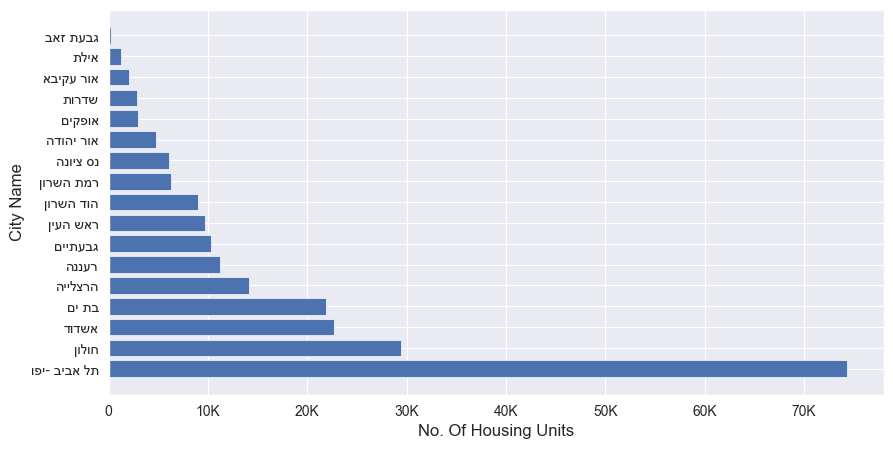

In [29]:
# Creating a barh plot
figure = plt.figure(figsize = (10,5))
plt.barh(labels, sizes)
plt.xlabel("No. Of Housing Units")
plt.ylabel("City Name")

# Using the Numerize module to format the price in the y-axis
formatter = ticker.FuncFormatter(lambda x, pos: numerize.numerize(x))
plt.gca().xaxis.set_major_formatter(formatter)

plt.show()

## 0.2: Visual presentation of housing unit prices in general

### Histograms:

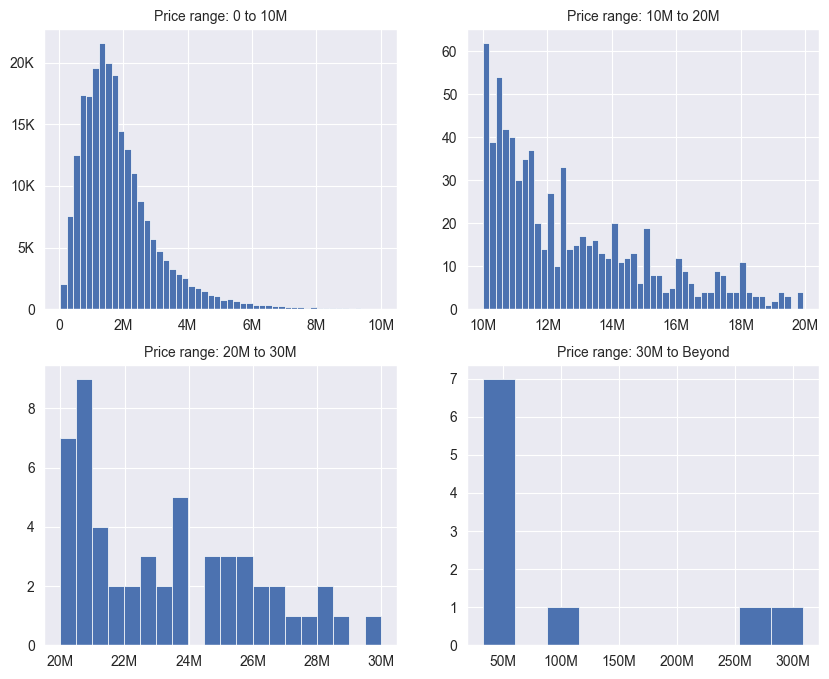

In [26]:
# creating a figure with 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# creating a custom formatter to format big numbers
x_formatter = ticker.FuncFormatter(lambda x, pos: numerize.numerize(x))
y_formatter = ticker.FuncFormatter(lambda y, pos: numerize.numerize(y))

# histogram 1: range 0 to 10M
axs[0, 0].hist(nadlan_cities_df[(nadlan_cities_df.Price >= 0) & (nadlan_cities_df.Price < 10_000_000)].Price, bins=50)
axs[0, 0].set_title("Price range: 0 to 10M", fontsize=10)
axs[0, 0].xaxis.set_major_formatter(x_formatter)
axs[0, 0].yaxis.set_major_formatter(y_formatter)

# histogram 2: range 10M to 20M
axs[0, 1].hist(nadlan_cities_df[(nadlan_cities_df.Price >= 10_000_000) & (nadlan_cities_df.Price < 20_000_000)].Price, bins=50)
axs[0, 1].set_title("Price range: 10M to 20M", fontsize=10)
axs[0, 1].xaxis.set_major_formatter(x_formatter)
axs[0, 1].yaxis.set_major_formatter(y_formatter)

# histogram 3: range 20M to 30M
axs[1, 0].hist(nadlan_cities_df[(nadlan_cities_df.Price >= 20_000_000) & (nadlan_cities_df.Price < 30_000_000)].Price, bins=20)
axs[1, 0].set_title("Price range: 20M to 30M", fontsize=10)
axs[1, 0].xaxis.set_major_formatter(x_formatter)
axs[1, 0].yaxis.set_major_formatter(y_formatter)

# histogram 4: range 30M to Beyond
axs[1, 1].hist(nadlan_cities_df[(nadlan_cities_df.Price >= 30_000_000)].Price, bins=10)
axs[1, 1].set_title("Price range: 30M to Beyond", fontsize=10)
axs[1, 1].xaxis.set_major_formatter(x_formatter)
axs[1, 1].yaxis.set_major_formatter(y_formatter)

# show the plots
plt.show()

# Step 0: Prolouge Conclusion
## What Have We Done:
1. We saw what the distribution of housing units is between the cities
    + Using Pie Chart
    + Using Barh Plot
2. We got a small taste in regards to the general price distribution of all housing units
    + Using Histograms

## What Have We Learned:
1. Using the Pie Chart and Barh Plot, we discovered that the more the city is central, the more populated it is and the more housing units it has, which could indicate a very high demand.
    + This is why 'תל אביב' constitutes about 30% of all our data, since Tel is considered the most central city in Israel.
    + This is why 'חולון' and 'בת ים' together make up about 18% of all our data, since they are very close to Tel Aviv.
    Despite this, there is a considerable part of our data that consists of cities that are not necessarily considered the center, but more peripheral, of which 'אשדוד' is the largest (about 9%).
2. Using Histograms, we learned that most of the housing units' prices in our data ranges from 0 to 10 million, but there are also quite a few several housing units' prices that can reach 300 million.

## What Should We Do Next:
1. Try to understand the importance of central cities such as: תל אביב, חולון, אשדוד, בת ים and etc', regarding their effect on the price.
    + And also how the Peripheral cities cities affect the price too.
2. Make use of our additional data and examine their relationship with the price and their relationship among themselves.
3. Examine our environmental databases
    + which contain environmental data on the neighborhoods of the cities we have collected.

to see if they also have affect on the price.



# Step 1: EDA - Main Dataset

## 1.1: Visual presentation of the relationship between price and other data types:

### 1.1.1: Relationship between price and sale date:

**Generally:**

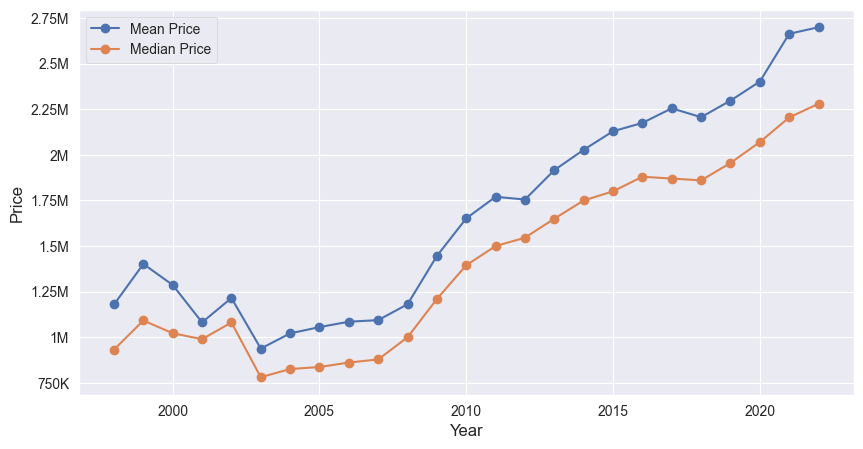

In [31]:
# Grouping the data by year
nadlan_cities_df_grouped = nadlan_cities_df.groupby(nadlan_cities_df['Sale_Date'].dt.year)

# Creating a line plot based on the mean of the price per year
nadlan_cities_df_grouped['Price'].mean().plot(kind='line', label='Mean Price', figsize= (10,5),style='o-')

# Creating a line plot based on the median of the price per year
nadlan_cities_df_grouped['Price'].median().plot(kind='line', label='Median Price',figsize= (10,5),style='o-')

plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()

# Using the Numerize module to format the price in the y-axis
formatter = ticker.FuncFormatter(lambda x, pos: numerize.numerize(x))
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

**Central Cities:**

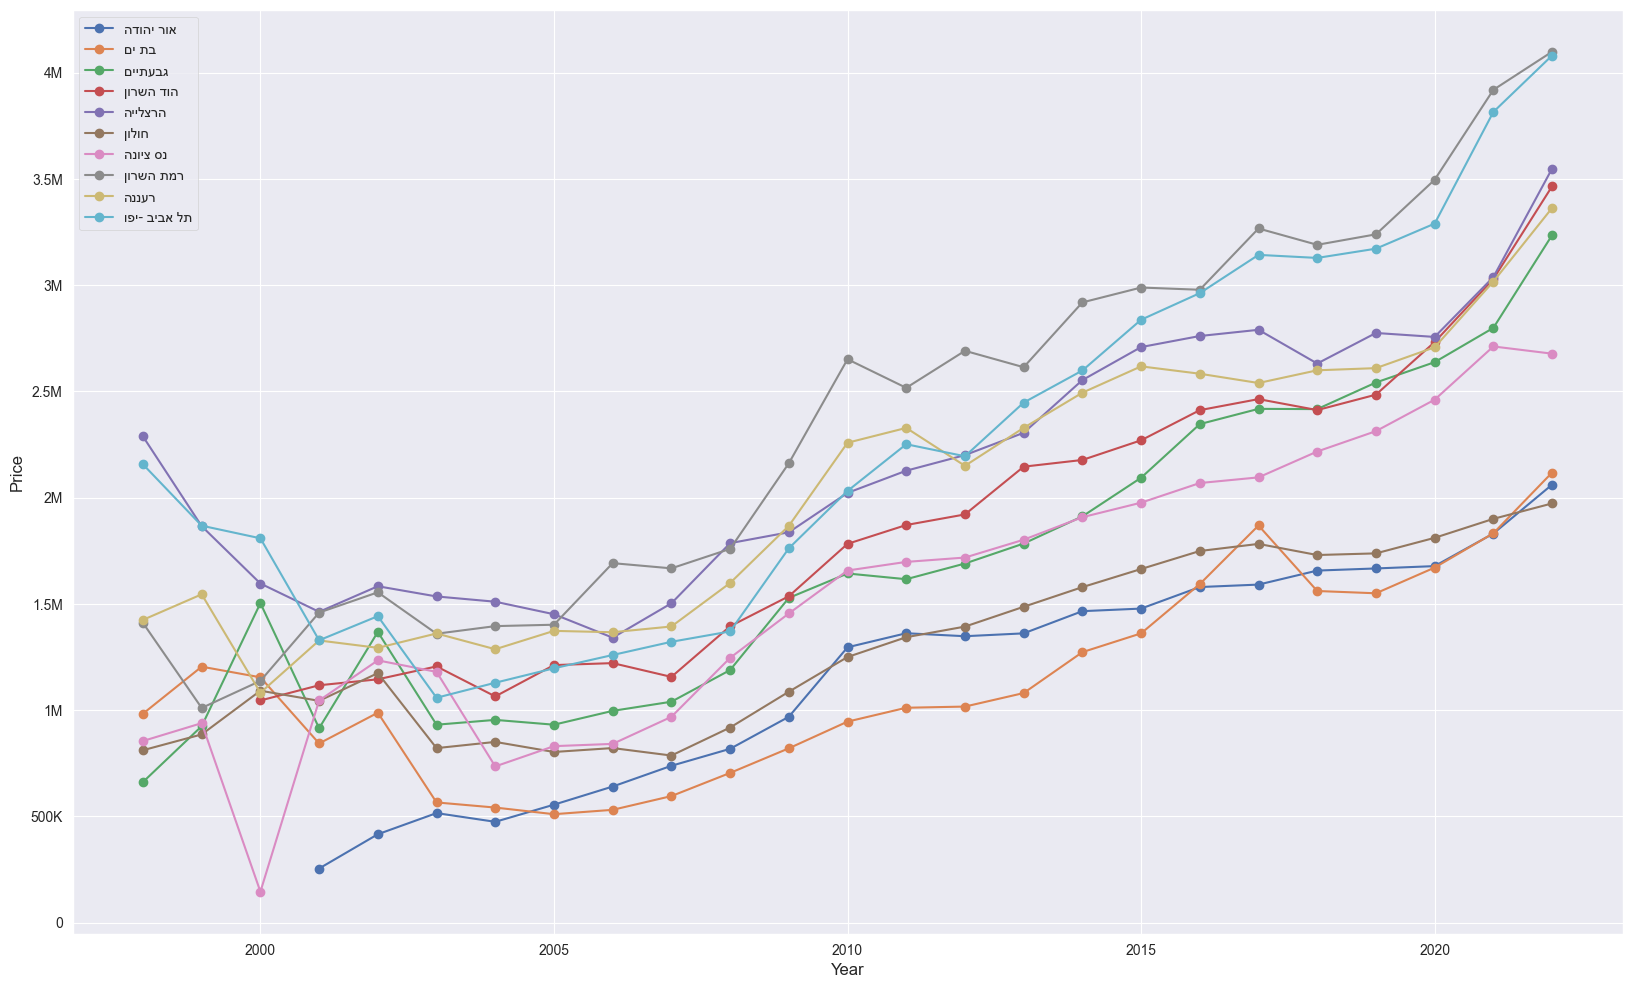

In [39]:
# Extracting the central cities
central_cities = ["תל אביב -יפו", "חולון", "בת ים", "הרצלייה", "הוד השרון", "נס ציונה", "רמת השרון", "רעננה", "אור יהודה", "גבעתיים"]
nadlan_central_cities_df = nadlan_cities_df[nadlan_cities_df.City.isin(values=central_cities)]

# Grouping the data by year and city
nadlan_cities_df_grouped = nadlan_central_cities_df.groupby([nadlan_central_cities_df['Sale_Date'].dt.year, 'City'])

# Creating a line plot for each group
nadlan_cities_df_grouped['Price'].mean().unstack().plot(kind='line', stacked=False, figsize= (20,12),style='o-')
plt.xlabel('Year')
plt.ylabel('Price')

# Reversing the order of city names in the legend (since they are written in Hebrew)
plt.legend(plt.legend().get_lines(), [l.get_label()[::-1] for l in plt.legend().get_lines()])

# Using the Numerize module to format the price in the y-axis
formatter = ticker.FuncFormatter(lambda x, pos: numerize.numerize(x))
plt.gca().yaxis.set_major_formatter(formatter)

# show the plot
plt.show()

**Peripheral cities:**

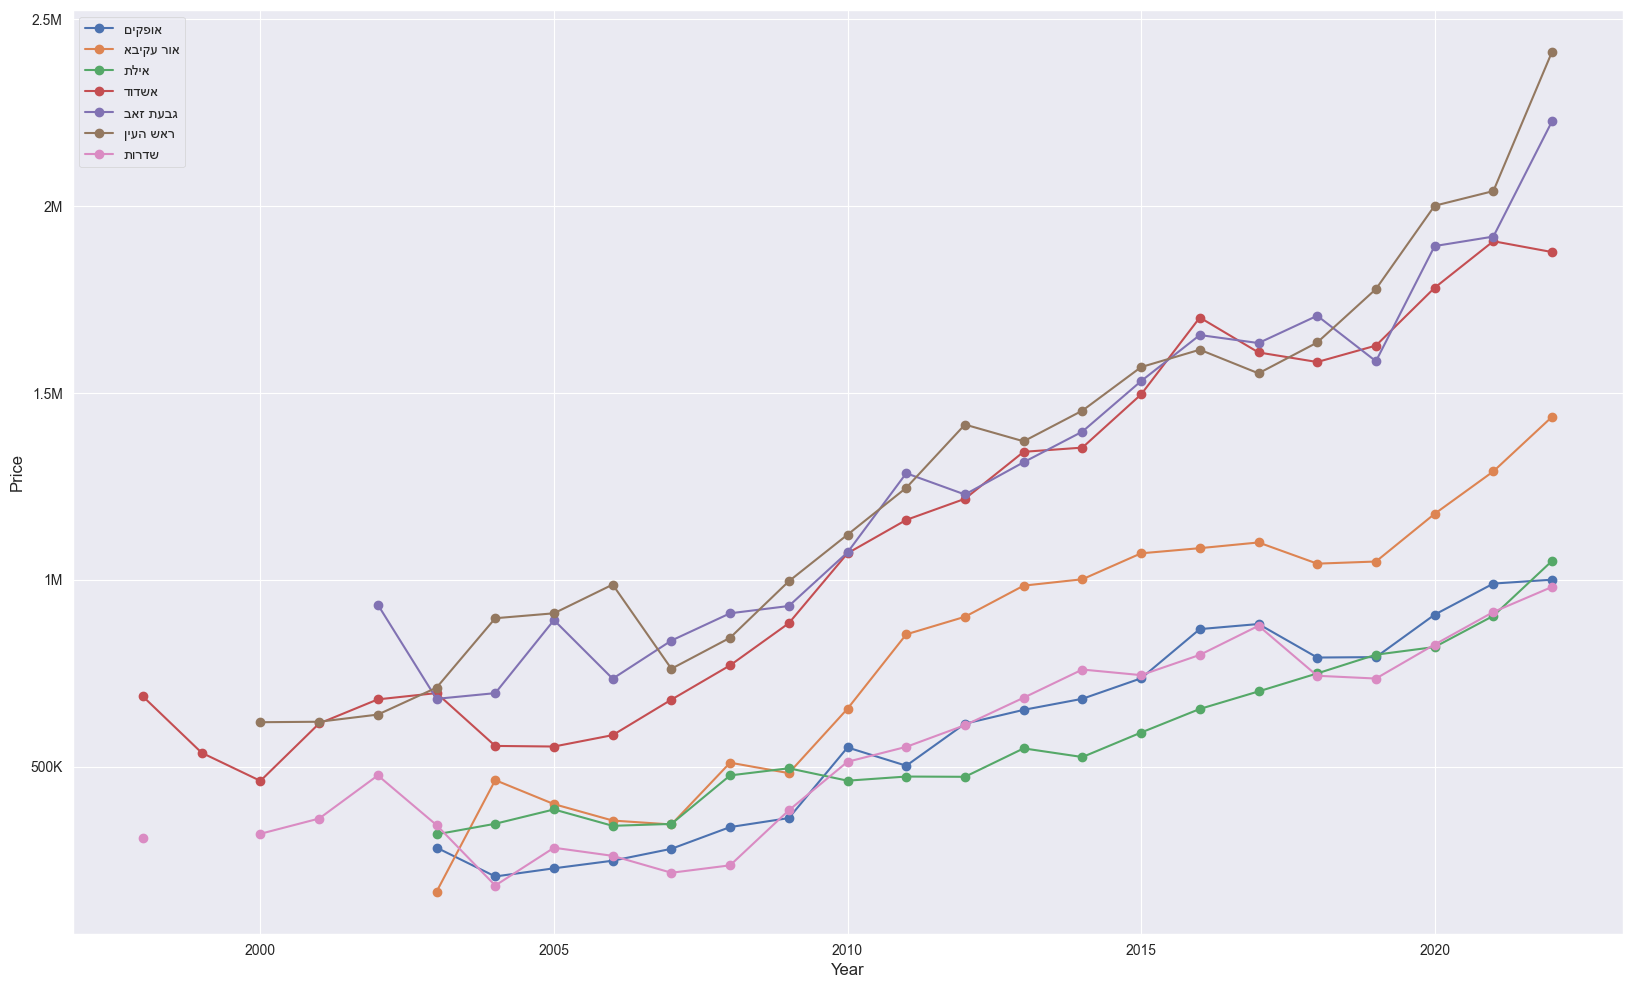

In [40]:
# Extracting the central cities
central_cities = ["תל אביב -יפו", "חולון", "בת ים", "הרצלייה", "הוד השרון", "נס ציונה", "רמת השרון", "רעננה", "אור יהודה", "גבעתיים"]
nadlan_peripheral_cities_df = nadlan_cities_df[~nadlan_cities_df.City.isin(values=central_cities)]

# Grouping the data by year and city
nadlan_cities_df_grouped = nadlan_peripheral_cities_df.groupby([nadlan_peripheral_cities_df['Sale_Date'].dt.year, 'City'])

# Creating a line plot for each group
nadlan_cities_df_grouped['Price'].mean().unstack().plot(kind='line', stacked=False, figsize= (20,12),style='o-')
plt.xlabel('Year')
plt.ylabel('Price')

# Reversing the order of city names in the legend (since they are written in Hebrew)
plt.legend(plt.legend().get_lines(), [l.get_label()[::-1] for l in plt.legend().get_lines()])

# Using the Numerize module to format the price in the y-axis
formatter = ticker.FuncFormatter(lambda x, pos: numerize.numerize(x))
plt.gca().yaxis.set_major_formatter(formatter)

# show the plot
plt.show()

**Overall:**

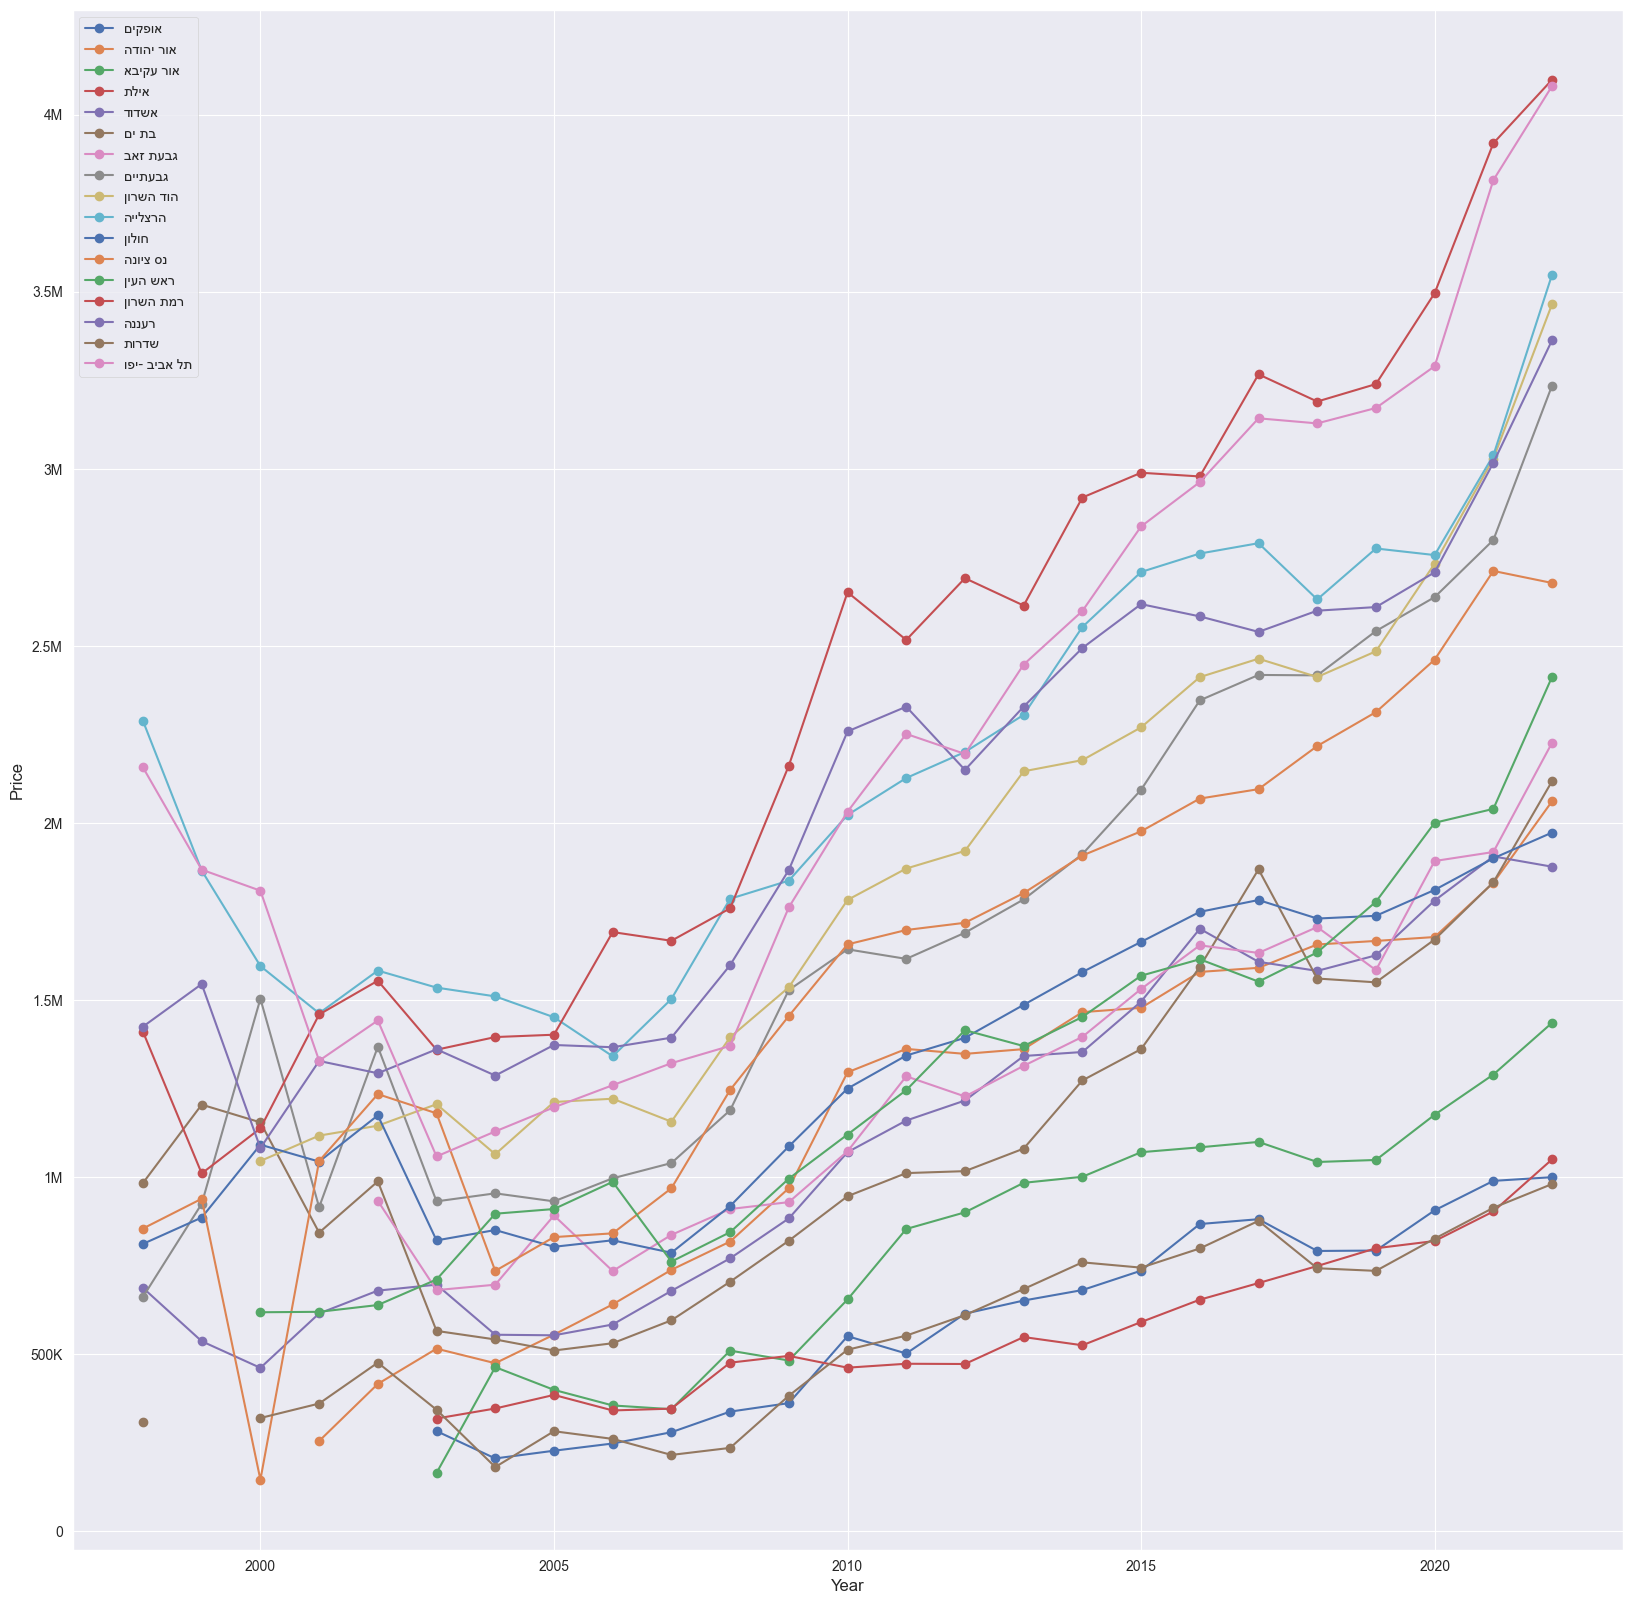

In [41]:
# Grouping the data by year and city
nadlan_cities_df_grouped = nadlan_cities_df.groupby([nadlan_cities_df['Sale_Date'].dt.year, 'City'])

# Creating a line plot for each group
nadlan_cities_df_grouped['Price'].mean().unstack().plot(kind='line', stacked=False, figsize= (20,20),style='o-')
plt.xlabel('Year')
plt.ylabel('Price')

# Reversing the order of city names in the legend (since they are written in Hebrew)
plt.legend(plt.legend().get_lines(), [l.get_label()[::-1] for l in plt.legend().get_lines()])

# Using the Numerize module to format the price in the y-axis
formatter = ticker.FuncFormatter(lambda x, pos: numerize.numerize(x))
plt.gca().yaxis.set_major_formatter(formatter)

# show the plot
plt.show()

### 1.1.2: Relationship between price and property type:

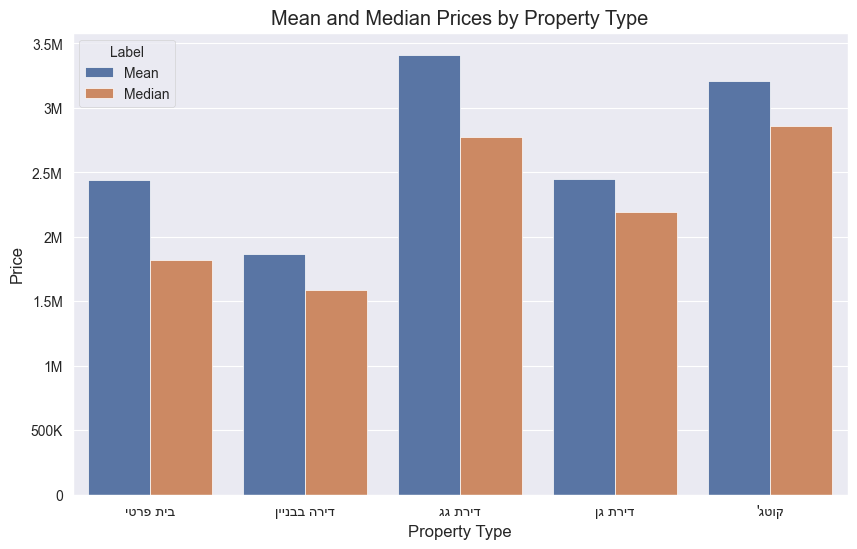

In [50]:
# Getting the mean and median prices for each property type
mean_prices = nadlan_cities_df.groupby(['Property_Type'])['Price'].mean()
median_prices = nadlan_cities_df.groupby(['Property_Type'])['Price'].median()

# Concatenating the mean and median prices
concatenated_prices = np.concatenate([mean_prices, median_prices])

# Creating a list of labels for the mean and median prices
labels = ["Mean"] * len(mean_prices) + ["Median"] * len(median_prices)

# Creating a list of property types for the mean and median prices
property_types = list(mean_prices.index) * 2

# Creating a new dataframe with the concatenated data
concatenated_prices_df = pd.DataFrame({'Property_Type': property_types, 'Price': concatenated_prices, 'Label': labels})

fig, axs = plt.subplots(figsize=(10,6))
sns.barplot(x='Property_Type', y='Price', hue='Label', data=concatenated_prices_df)
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.title("Mean and Median Prices by Property Type")

# Using the Numerize module to format the price in the y-axis
ax = plt.gca()
formatter = ticker.FuncFormatter(lambda x, pos: numerize.numerize(x))
ax.yaxis.set_major_formatter(formatter)

# Changing the x-axis tick labels
property_type_list = ["בית פרטי"[::-1], "דירה בבניין"[::-1], "דירת גג"[::-1], "דירת גן"[::-1], "קוטג'"[::-1]]
plt.xticks(range(len(property_type_list)), property_type_list)

plt.show()

### 1.1.3: Relationship between price and rooms:

In [51]:
# Creating a function to bin the room data into ranges
def rooms_range_func(x):
    if x <= 3:
        return "1-3"
    elif x >= 4 and x <= 6:
        return "4-6"
    elif x >= 7 and x <= 10:
        return "7-10"
    else:
        return "11 and above"

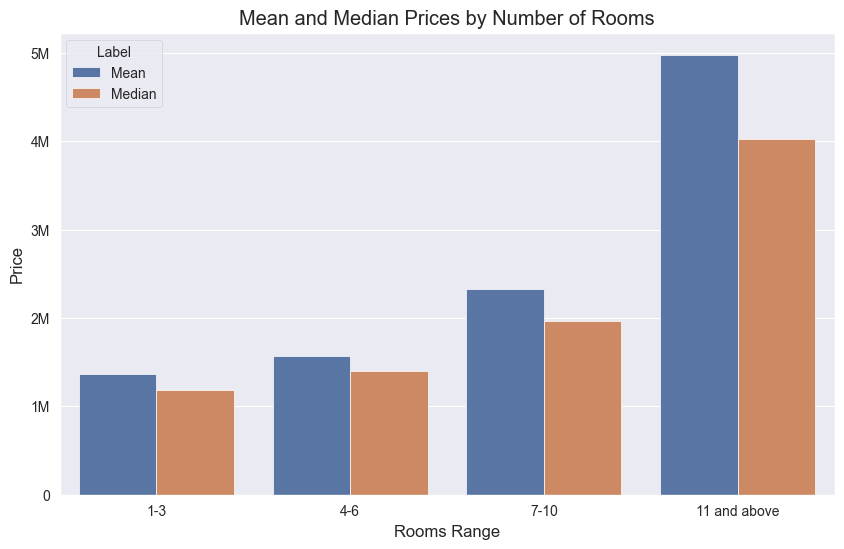

In [52]:
# Adding a temporary column to the dataframe with the square meter range
nadlan_cities_df["Rooms_Range"] = nadlan_cities_df["Rooms"].apply(rooms_range_func)

# Getting the mean and median prices for each property type
mean_prices = nadlan_cities_df.groupby(['Rooms_Range'])['Price'].mean()
median_prices = nadlan_cities_df.groupby(['Rooms_Range'])['Price'].median()

# Concatenating the mean and median prices
concatenated_prices = np.concatenate([mean_prices, median_prices])

# Creating a list of labels for the mean and median prices
labels = ["Mean"] * len(mean_prices) + ["Median"] * len(median_prices)

# Creating a list of range of rooms for the mean and median prices
rooms_ranges = ["1-3", "4-6", "7-10", "11 and above"] * 2

# Creating a new dataframe with the concatenated data
concatenated_prices_df = pd.DataFrame({'Rooms_Range': rooms_ranges, 'Price': concatenated_prices, 'Label': labels})

fig, axs = plt.subplots(figsize=(10,6))
sns.set_palette("deep")
sns.barplot(x='Rooms_Range', y='Price', hue='Label', data=concatenated_prices_df)
plt.xlabel('Rooms Range')
plt.ylabel('Price')
plt.title("Mean and Median Prices by Number of Rooms")

# Using the Numerize module to format the price in the y-axis
ax = plt.gca()
formatter = ticker.FuncFormatter(lambda x, pos: numerize.numerize(x))
ax.yaxis.set_major_formatter(formatter)

# Dropping the temporary column
nadlan_cities_df.drop(["Rooms_Range"], axis=1, inplace=True)

plt.show()

### 1.1.4: Relationship between price and square meter:

In [53]:
# Creating a function to bin the square meter data into ranges
def square_meter_range_func(x):
    if x < 101:
        return "0-100"
    elif x < 201:
        return "101-200"
    else:
        return "201-300"

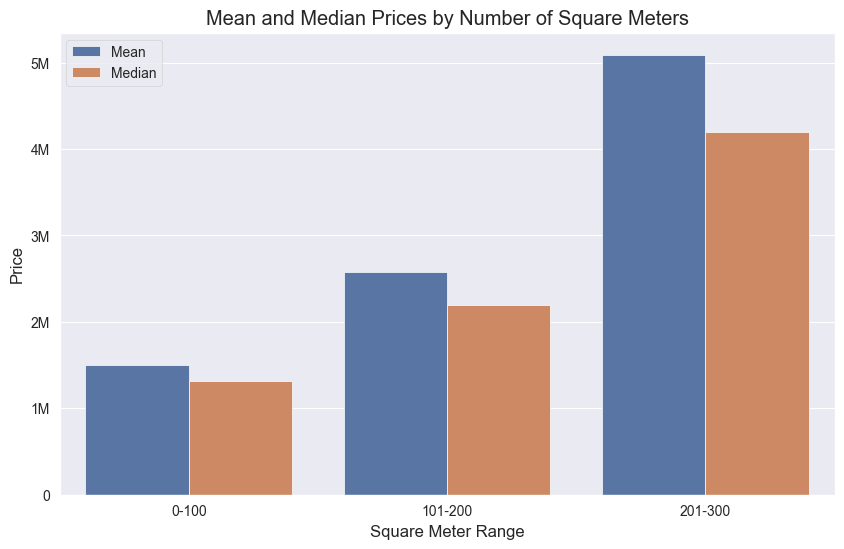

In [54]:
# Adding a temporary column to the dataframe with the square meter range
nadlan_cities_df["Square_Meter_Range"] = nadlan_cities_df["Square_Meter"].apply(square_meter_range_func)

# Getting the mean and median prices for each property type
mean_prices = nadlan_cities_df.groupby(['Square_Meter_Range'])['Price'].mean()
median_prices = nadlan_cities_df.groupby(['Square_Meter_Range'])['Price'].median()

# Concatenating the mean and median prices
concatenated_prices = np.concatenate([mean_prices, median_prices])

# Creating a list of labels for the mean and median prices
labels = ["Mean"] * len(mean_prices) + ["Median"] * len(median_prices)

# Creating a list of square meter range types for the mean and median prices
square_meter_ranges = ["0-100", "101-200", "201-300"] * 2

# Creating a new dataframe with the concatenated data
concatenated_prices_df = pd.DataFrame({'Square_Meter_Range': square_meter_ranges, 'Price': concatenated_prices, 'Label': labels})

# Using seaborn to create a bar plot, displaying both the mean and median price
fig, axs = plt.subplots(figsize=(10,6))
sns.set_palette("deep")
sns.barplot(x='Square_Meter_Range', y='Price', hue='Label', data=concatenated_prices_df)
plt.xlabel('Square Meter Range')
plt.ylabel('Price')
plt.legend(loc="upper left")
plt.title("Mean and Median Prices by Number of Square Meters")

# Use the Numerize module to format the price in the y-axis
ax = plt.gca()
formatter = ticker.FuncFormatter(lambda x, pos: numerize.numerize(x))
ax.yaxis.set_major_formatter(formatter)

# Dropping the temporary column
nadlan_cities_df.drop(["Square_Meter_Range"], axis=1, inplace=True)

plt.show()

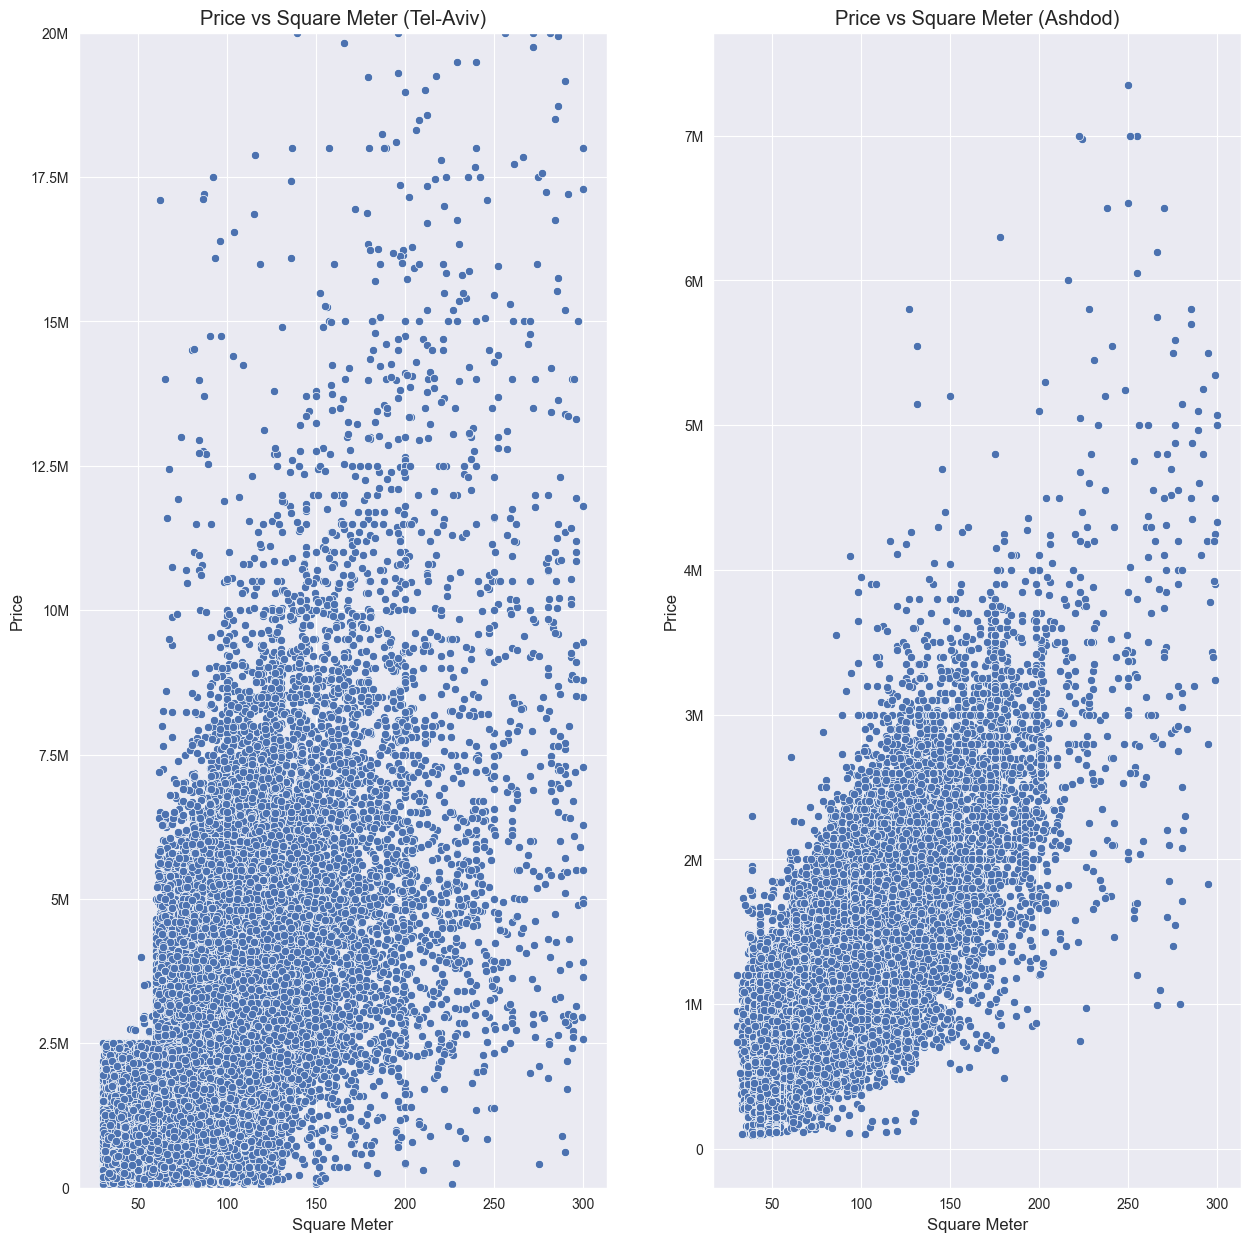

In [65]:
import matplotlib.cm as cm

nadlan_TelAviv_df = nadlan_cities_df[(nadlan_cities_df["City"] == "תל אביב -יפו")]
nadlan_Ashdod_df = nadlan_cities_df[(nadlan_cities_df["City"] == "אשדוד")]

# creating a figure with 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 15))

# creating a custom formatter to format the price in the y-axis
formatter = ticker.FuncFormatter(lambda x, pos: numerize.numerize(x))

sns.scatterplot(x='Square_Meter', y='Price', data=nadlan_TelAviv_df, ax=axs[0])
sns.set_palette("deep")
axs[0].set_ylim(0, 20_000_000)
axs[0].set_xlabel('Square Meter')
axs[0].set_ylabel('Price')
axs[0].set_title('Price vs Square Meter (Tel-Aviv)')
axs[0].yaxis.set_major_formatter(formatter)

sns.scatterplot(x='Square_Meter', y='Price', data=nadlan_Ashdod_df, ax=axs[1])
axs[1].set_xlabel('Square Meter')
axs[1].set_ylabel('Price')
axs[1].set_title('Price vs Square Meter (Ashdod)')
axs[1].yaxis.set_major_formatter(formatter)
plt.show()


## 1.2: Visual presentation of the relationship between the other data types themselves:

### 1.2.1: Relationship between sale date and square meter:

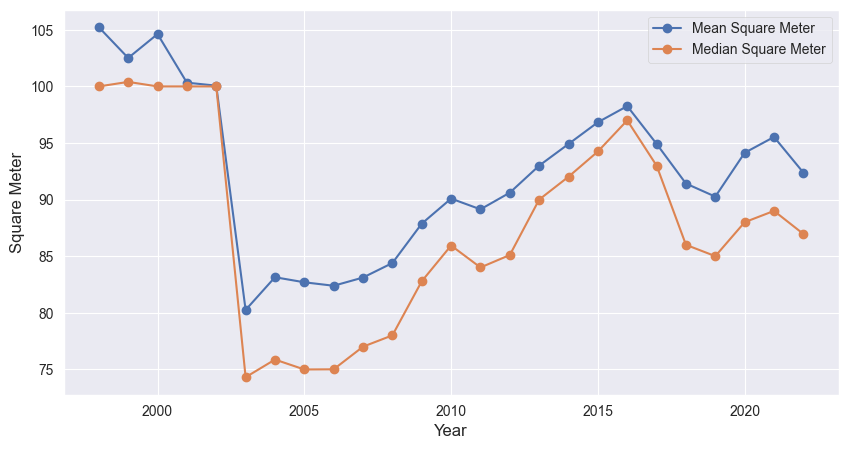

In [66]:
# Grouping the data by year
nadlan_cities_df_grouped = nadlan_cities_df.groupby(nadlan_cities_df['Sale_Date'].dt.year)

# Creating a line plot based on the mean of the price per year
nadlan_cities_df_grouped['Square_Meter'].mean().plot(kind='line', label='Mean Square Meter', figsize= (10,5),style='o-')

# Creating a line plot based on the median of the price per year
nadlan_cities_df_grouped['Square_Meter'].median().plot(kind='line', label='Median Square Meter',figsize= (10,5),style='o-')

plt.xlabel('Year')
plt.ylabel('Square Meter')
plt.legend()

# Using the Numerize module to format the price in the y-axis
formatter = ticker.FuncFormatter(lambda x, pos: numerize.numerize(x))
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

### 1.2.2: Relationship between sale date and floor:

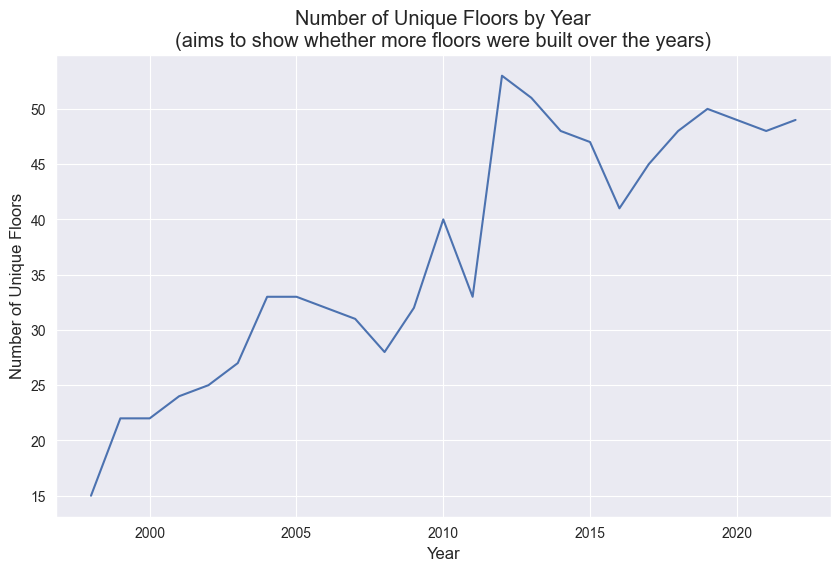

In [67]:
# Extract the year from the Sale_Date column
nadlan_cities_df['Sale_Year'] = nadlan_cities_df['Sale_Date'].dt.year

# Group the data by Sale_Year and Floor, and count the number of unique floors for each year
unique_floors_df = nadlan_cities_df.groupby(['Sale_Year'])['Floor'].nunique().reset_index()

# Use seaborn to create a line plot of the data
plt.figure(figsize=(10,6))
sns.lineplot(x='Sale_Year', y='Floor', data=unique_floors_df)

# Add axis labels and a title
plt.xlabel('Year')
plt.ylabel('Number of Unique Floors')
plt.title('Number of Unique Floors by Year\n(aims to show whether more floors were built over the years)')

# Dropping the temporary column
nadlan_cities_df.drop(["Sale_Year"], axis=1, inplace=True)

plt.show()

### 1.2.3: Relationship between sale date and rooms:

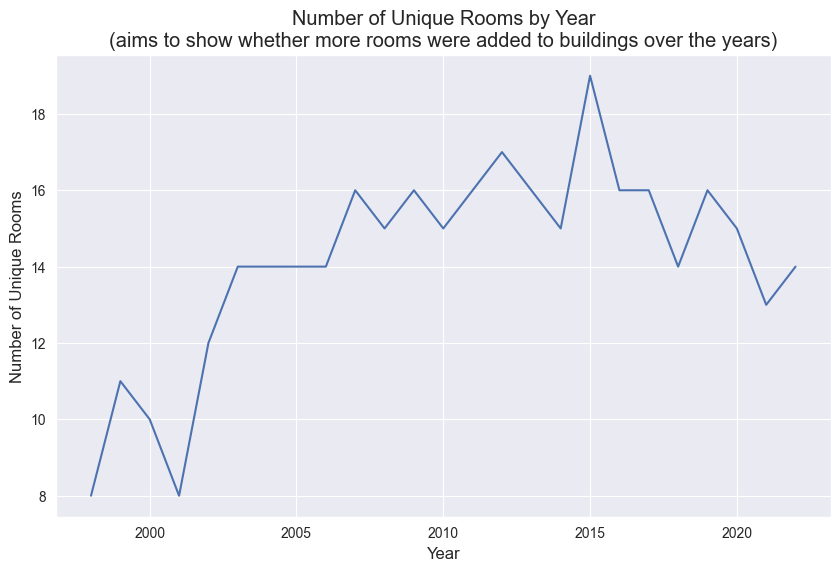

In [68]:
# Extract the year from the Sale_Date column
nadlan_cities_df['Sale_Year'] = nadlan_cities_df['Sale_Date'].dt.year

# Group the data by Sale_Year and Floor, and count the number of unique floors for each year
unique_rooms_df = nadlan_cities_df.groupby(['Sale_Year'])['Rooms'].nunique().reset_index()

# Use seaborn to create a line plot of the data
plt.figure(figsize=(10,6))
sns.lineplot(x='Sale_Year', y='Rooms', data=unique_rooms_df)

# Add axis labels and a title
plt.xlabel('Year')
plt.ylabel('Number of Unique Rooms')
plt.title('Number of Unique Rooms by Year\n(aims to show whether more rooms were added to buildings over the years)')

# Dropping the temporary column
nadlan_cities_df.drop(["Sale_Year"], axis=1, inplace=True)

plt.show()

# Step 1: Main Dataset Conclusion:

## What Have We Done:
1. We visually examined the relationship between a considerable amount of our data and the prices of housing units in a number of cities in Israel.
    + Using Line Plots
    + Using Bar Plots
2. We visually examined the relationship between all non-price data with themselves.
    + Using Line Plots

## What Have We Learned:
1. We discovered that as time went on, housing units prices saw particularly skyrocket increases
    + As we suspected, those increases has relatively occurred mainly in the central cities, but over time the peripheral cities also showed a sharp increase in prices.
2. We saw how property types and the amount of square meters affect the housing units prices.
    + Surprisingly enough, although it is indeed possible to see the affect of the type of property and square meter on the prices of housing units, it seems that the location of the housing unit and the growing years effect the price more than the type of property or the square meters effect the price.
        + For instance, we saw that when we compared the effect of square meter on price in Tel-Aviv and in Ashdod separately.
3. We also managed to learn of an increase in the number of sale housing units with higher floors, which strongly indicates of population growth and greater demand for housing.

# Step 2: EDA - Environment Dataset

## Step 2.1: Evaluation of the average and median housing unit prices in each neighborhood in each city:

In [69]:
# Grouping the main dataset by the 'Neighborhood' column, and calculate the mean and median of the 'Price' column
neighborhood_statistics = nadlan_cities_df.groupby(["Neighborhood"])["Price"].agg(["mean", "median"])

# Reseting the index of the neighborhood_statistics dataframe so that the 'Neighborhood' column is now a column instead of an index
neighborhood_statistics = neighborhood_statistics.reset_index()

# Merging the 'mean' column from the neighborhood_statistics dataframe to the nadlan_environmental_mean_df dataframe, joining on the 'Neighborhood' column
nadlan_environmental_mean_df = pd.merge(nadlan_environmental_mean_df, neighborhood_statistics[['Neighborhood', 'mean']])

# Merging the 'median' column from the neighborhood_statistics dataframe to the nadlan_environmental_median_df dataframe, joining on the 'Neighborhood' column
nadlan_environmental_median_df = pd.merge(nadlan_environmental_median_df, neighborhood_statistics[['Neighborhood', 'median']])

## 2.2: Visual presentation of the relationship between price and other data types:

### **Heatmaps:**

**Mean/Median vs Education Institutions:**

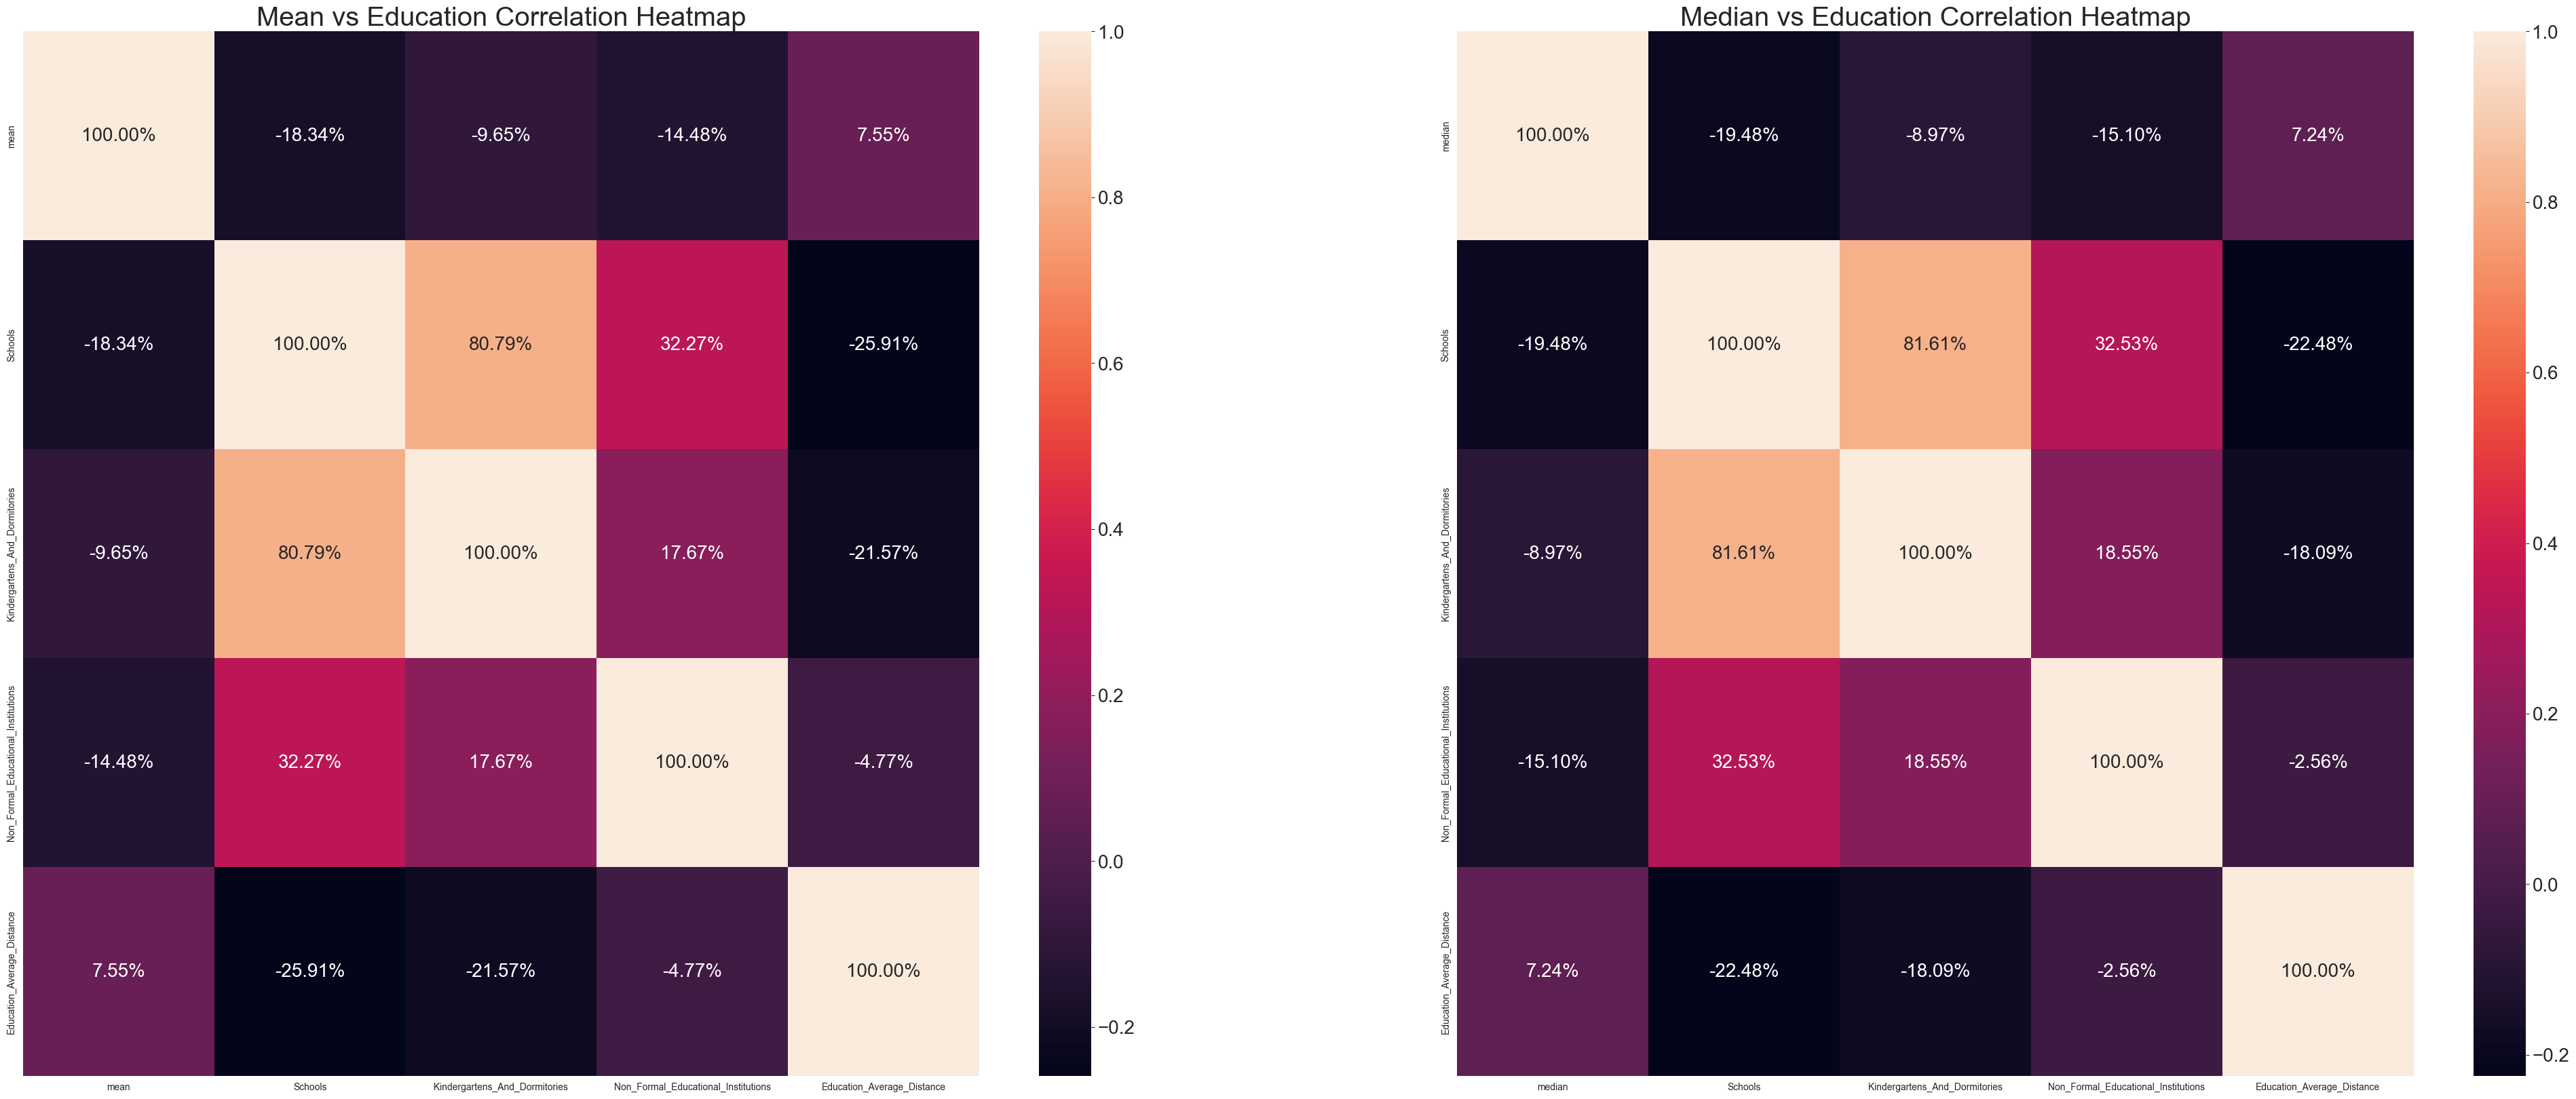

In [70]:
# Creating a figure with 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(50, 20))
mpl.rcParams.update({'font.size': 20})

# Extracting only the necessary columns from the 'nadlan_environmental_mean_df'
mean_vs_education_list = ["mean", "Schools", "Kindergartens_And_Dormitories", "Non_Formal_Educational_Institutions", "Education_Average_Distance"]
mean_vs_education_df = nadlan_environmental_mean_df[mean_vs_education_list]

# Setting the first subplot to display the heatmap of the 'mean_vs_education_df'
sns.heatmap(mean_vs_education_df.corr(), annot=True, fmt='.2%', ax=axs[0])
axs[0].set_title('Mean vs Education Correlation Heatmap')

# Extracting only the necessary columns from the 'nadlan_environmental_median_df'
median_vs_education_list = ["median", "Schools", "Kindergartens_And_Dormitories", "Non_Formal_Educational_Institutions", "Education_Average_Distance"]
median_vs_education_df = nadlan_environmental_median_df[median_vs_education_list]

# Setting the second subplot to display the heatmap of the 'median_vs_education_df'
sns.heatmap(median_vs_education_df.corr(), annot=True, fmt='.2%', ax=axs[1])
axs[1].set_title('Median vs Education Correlation Heatmap')

plt.show()

**Mean/Median vs Green Areas:**

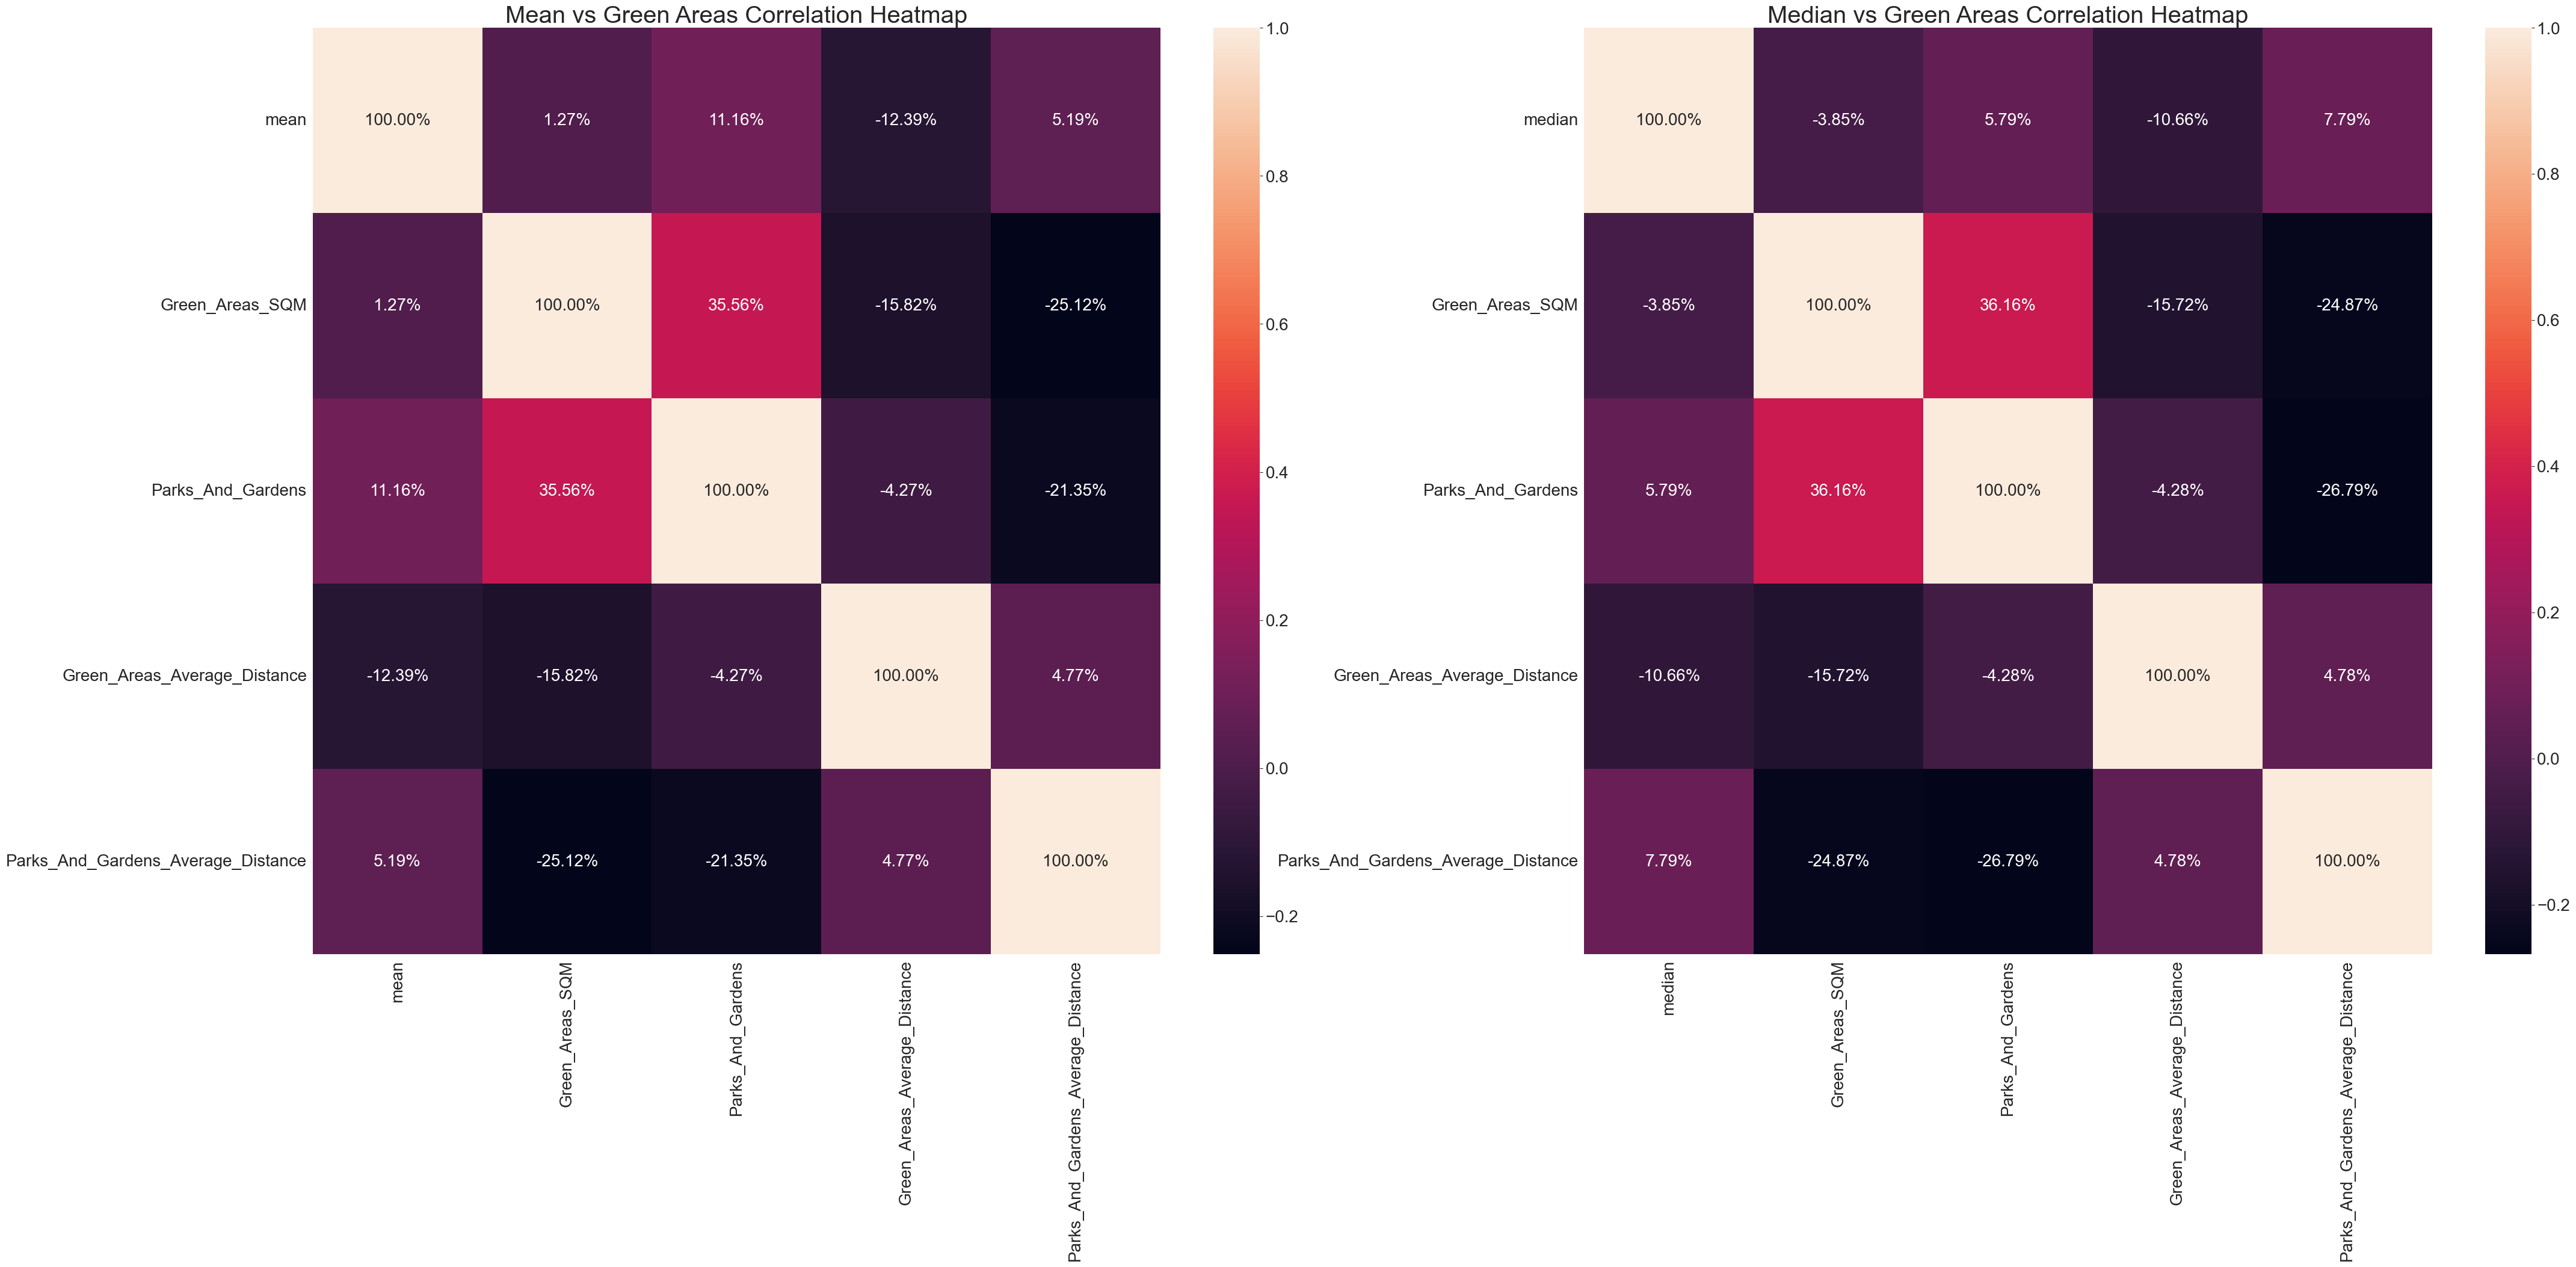

In [71]:
# Creating a figure with 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(50, 20))
mpl.rcParams.update({'font.size': 20})

# Extracting only the necessary columns from the 'nadlan_environmental_mean_df'
mean_vs_green_list = ['mean', 'Green_Areas_SQM','Parks_And_Gardens', 'Green_Areas_Average_Distance','Parks_And_Gardens_Average_Distance']
mean_vs_green_df = nadlan_environmental_mean_df[mean_vs_green_list]

# Setting the first subplot to display the heatmap of the 'mean_vs_green_df'
sns.heatmap(mean_vs_green_df.corr(), annot=True, fmt='.2%', ax=axs[0])
axs[0].set_title('Mean vs Green Areas Correlation Heatmap')

# Extracting only the necessary columns from the 'nadlan_environmental_median_df'
median_vs_green_list = ['median', 'Green_Areas_SQM','Parks_And_Gardens', 'Green_Areas_Average_Distance','Parks_And_Gardens_Average_Distance']
median_vs_green_df = nadlan_environmental_median_df[median_vs_green_list]

# Setting the second subplot to display the heatmap of the 'median_vs_green_df'
sns.heatmap(median_vs_green_df.corr(), annot=True, fmt='.2%', ax=axs[1])
axs[1].set_title('Median vs Green Areas Correlation Heatmap')

plt.show()

**Mean/Median vs Public Buildings:**

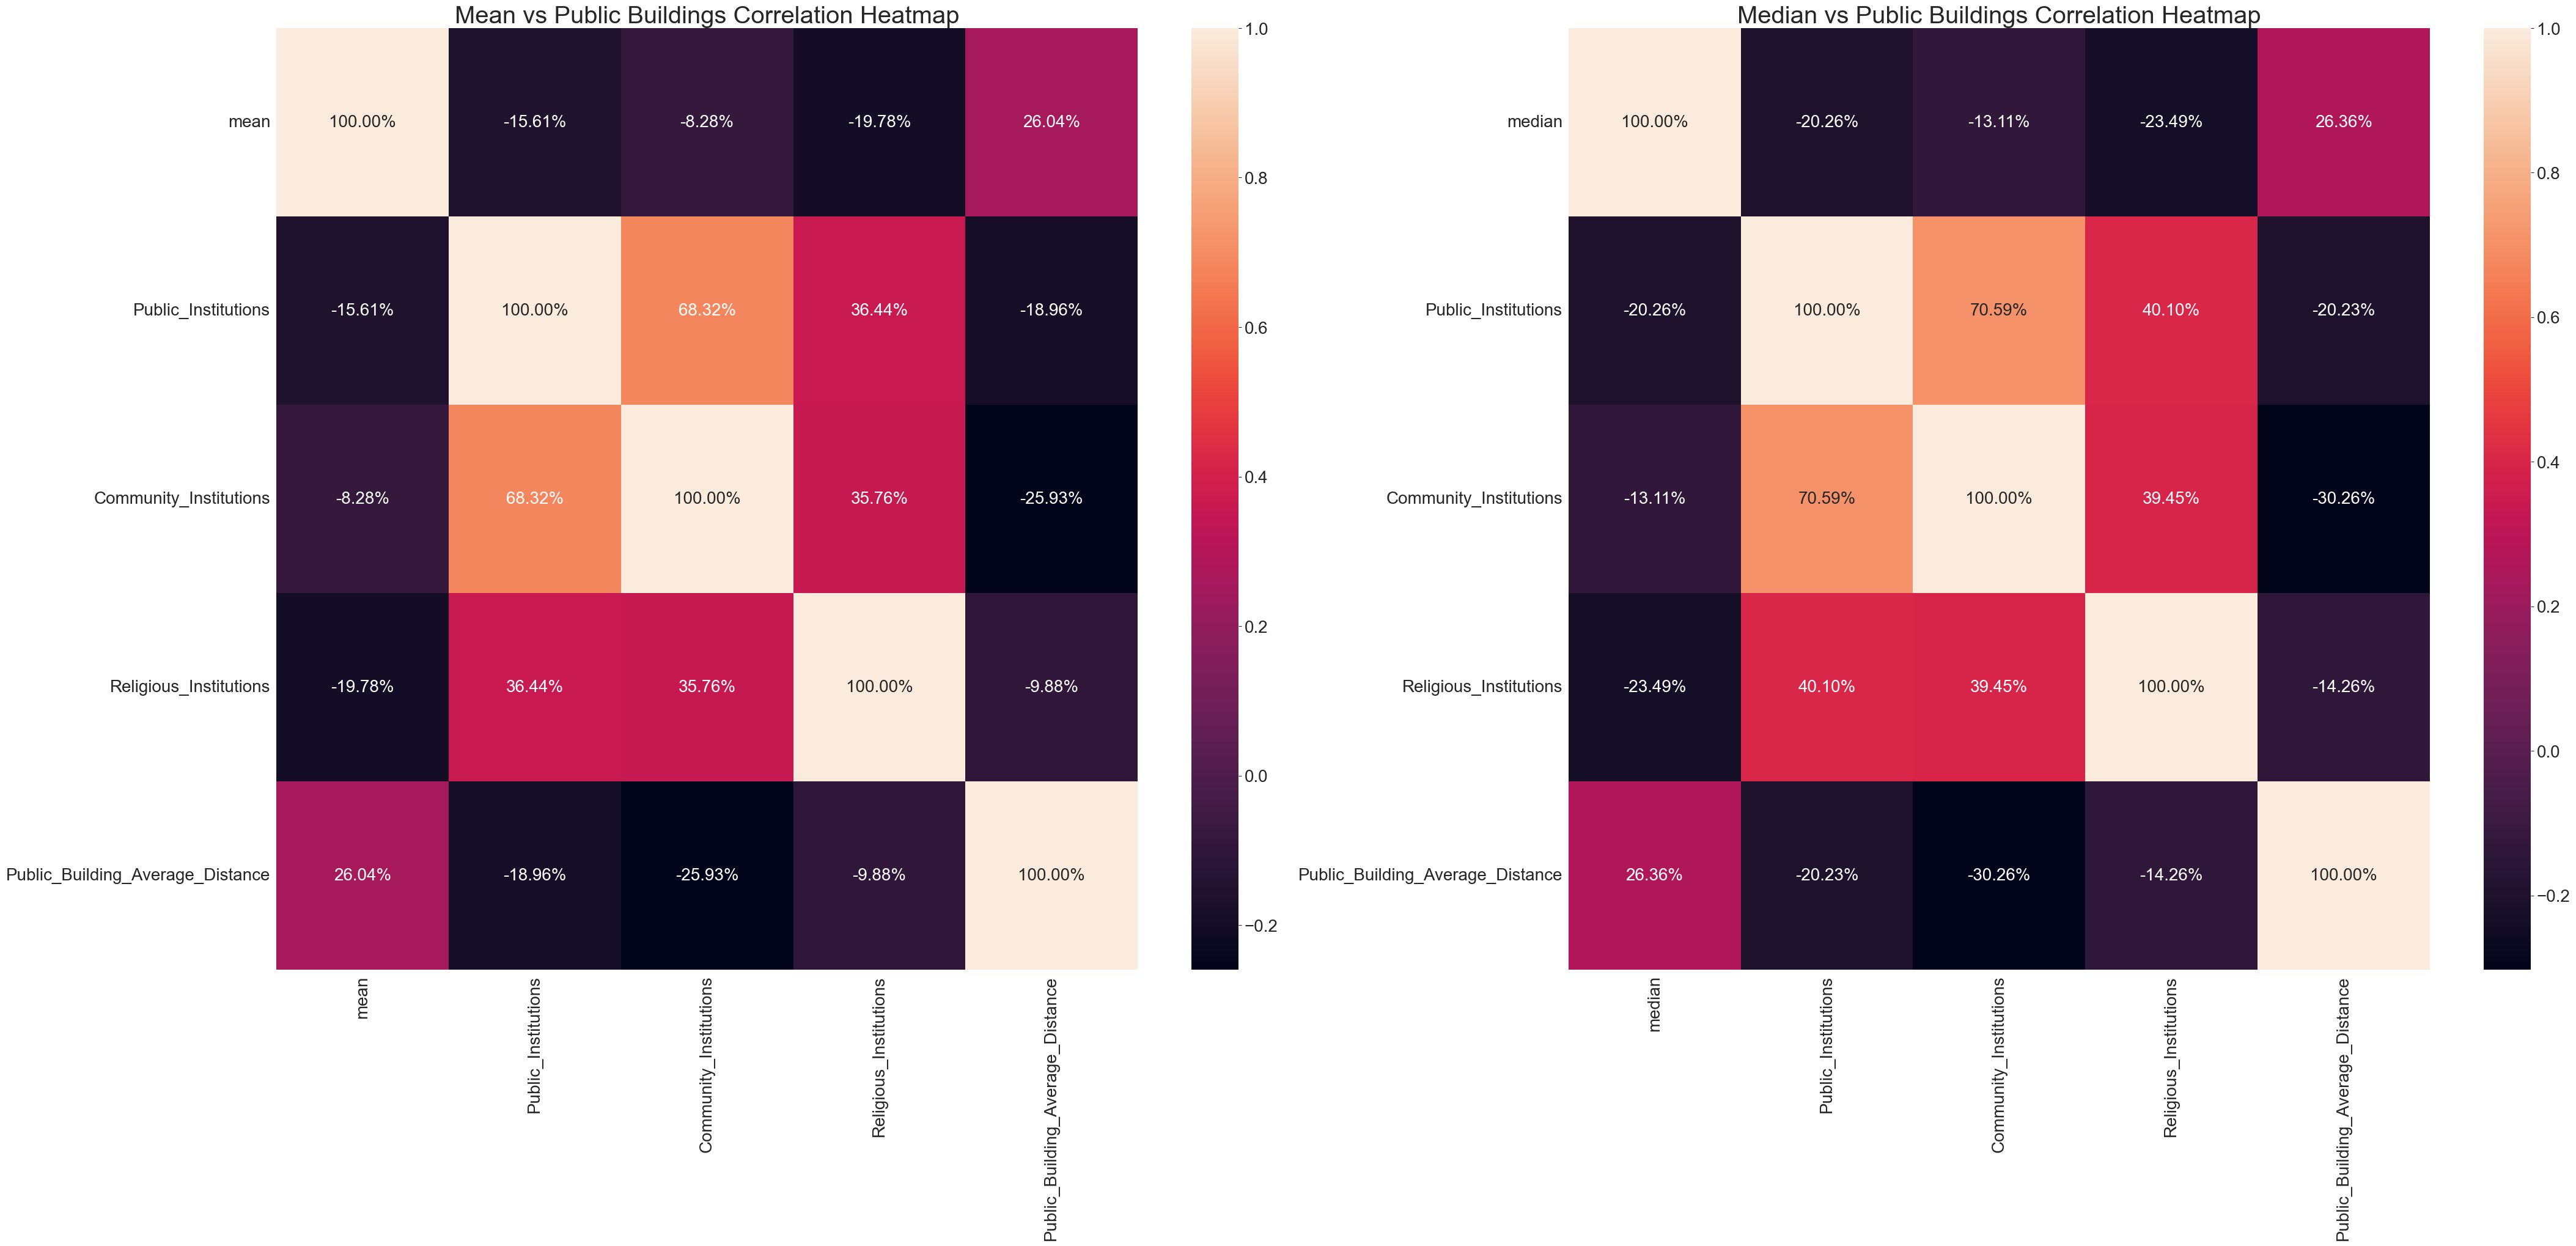

In [72]:
# Creating a figure with 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(50, 20))
mpl.rcParams.update({'font.size': 20})

# Extracting only the necessary columns from the 'nadlan_environmental_mean_df'
mean_vs_public_list = ['mean', 'Public_Institutions','Community_Institutions', 'Religious_Institutions','Public_Building_Average_Distance']
mean_vs_public_df = nadlan_environmental_mean_df[mean_vs_public_list]

# Setting the first subplot to display the heatmap of the 'mean_vs_public_df'
sns.heatmap(mean_vs_public_df.corr(), annot=True, fmt='.2%', ax=axs[0])
axs[0].set_title('Mean vs Public Buildings Correlation Heatmap')

# Extracting only the necessary columns from the 'nadlan_environmental_median_df'
median_vs_public_list = ['median', 'Public_Institutions','Community_Institutions', 'Religious_Institutions','Public_Building_Average_Distance']
median_vs_public_df = nadlan_environmental_median_df[median_vs_public_list]

# Setting the second subplot to display the heatmap of the 'median_vs_public_df'
sns.heatmap(median_vs_public_df.corr(), annot=True, fmt='.2%', ax=axs[1])
axs[1].set_title('Median vs Public Buildings Correlation Heatmap')

plt.show()

**Overall:**

C:\Users\Maor\AppData\Local\Temp\ipykernel_15264\2338268061.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(nadlan_environmental_mean_df.corr(), annot=True, fmt='.2%', ax=axs[0])
C:\Users\Maor\AppData\Local\Temp\ipykernel_15264\2338268061.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(nadlan_environmental_median_df.corr(), annot=True, fmt='.2%', ax=axs[1])


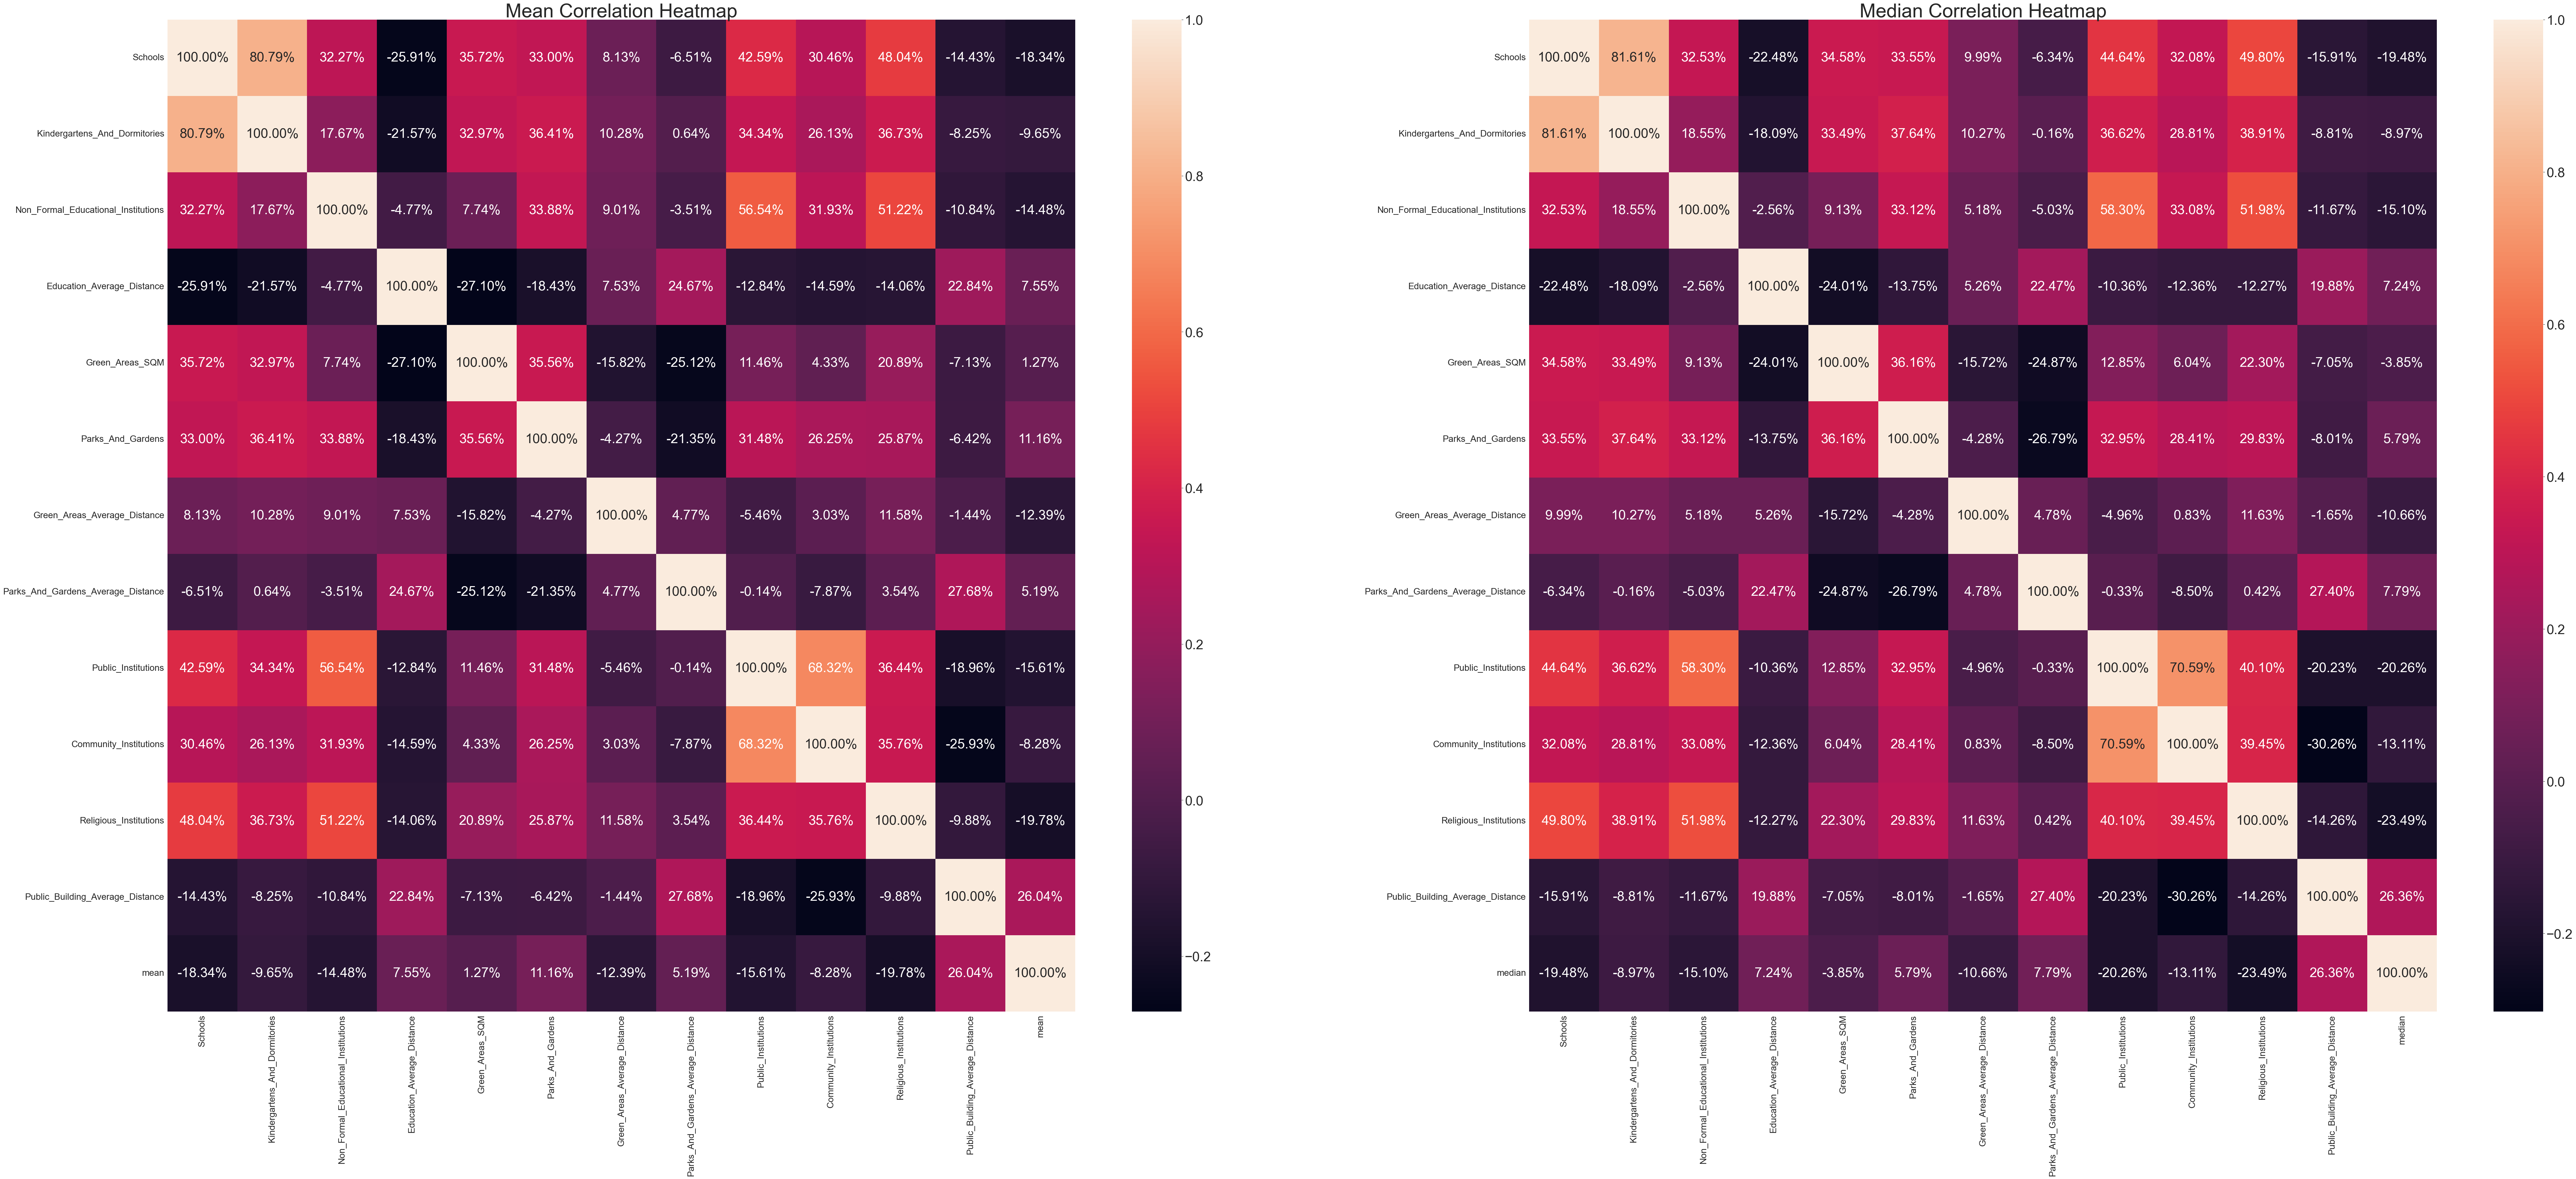

In [73]:
# Create a figure with 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(100, 40))
mpl.rcParams.update({'font.size': 30})

# Set the first subplot to display the heatmap of the 'nadlan_environmental_mean_df'
sns.heatmap(nadlan_environmental_mean_df.corr(), annot=True, fmt='.2%', ax=axs[0])
axs[0].set_title('Mean Correlation Heatmap')

# Set the second subplot to display the heatmap of the 'nadlan_environmental_median_df'
sns.heatmap(nadlan_environmental_median_df.corr(), annot=True, fmt='.2%', ax=axs[1])
axs[1].set_title('Median Correlation Heatmap')

# Show the figure
plt.show()

### **Scatter Plots**:

**Mean/Median vs Education Institutions:**

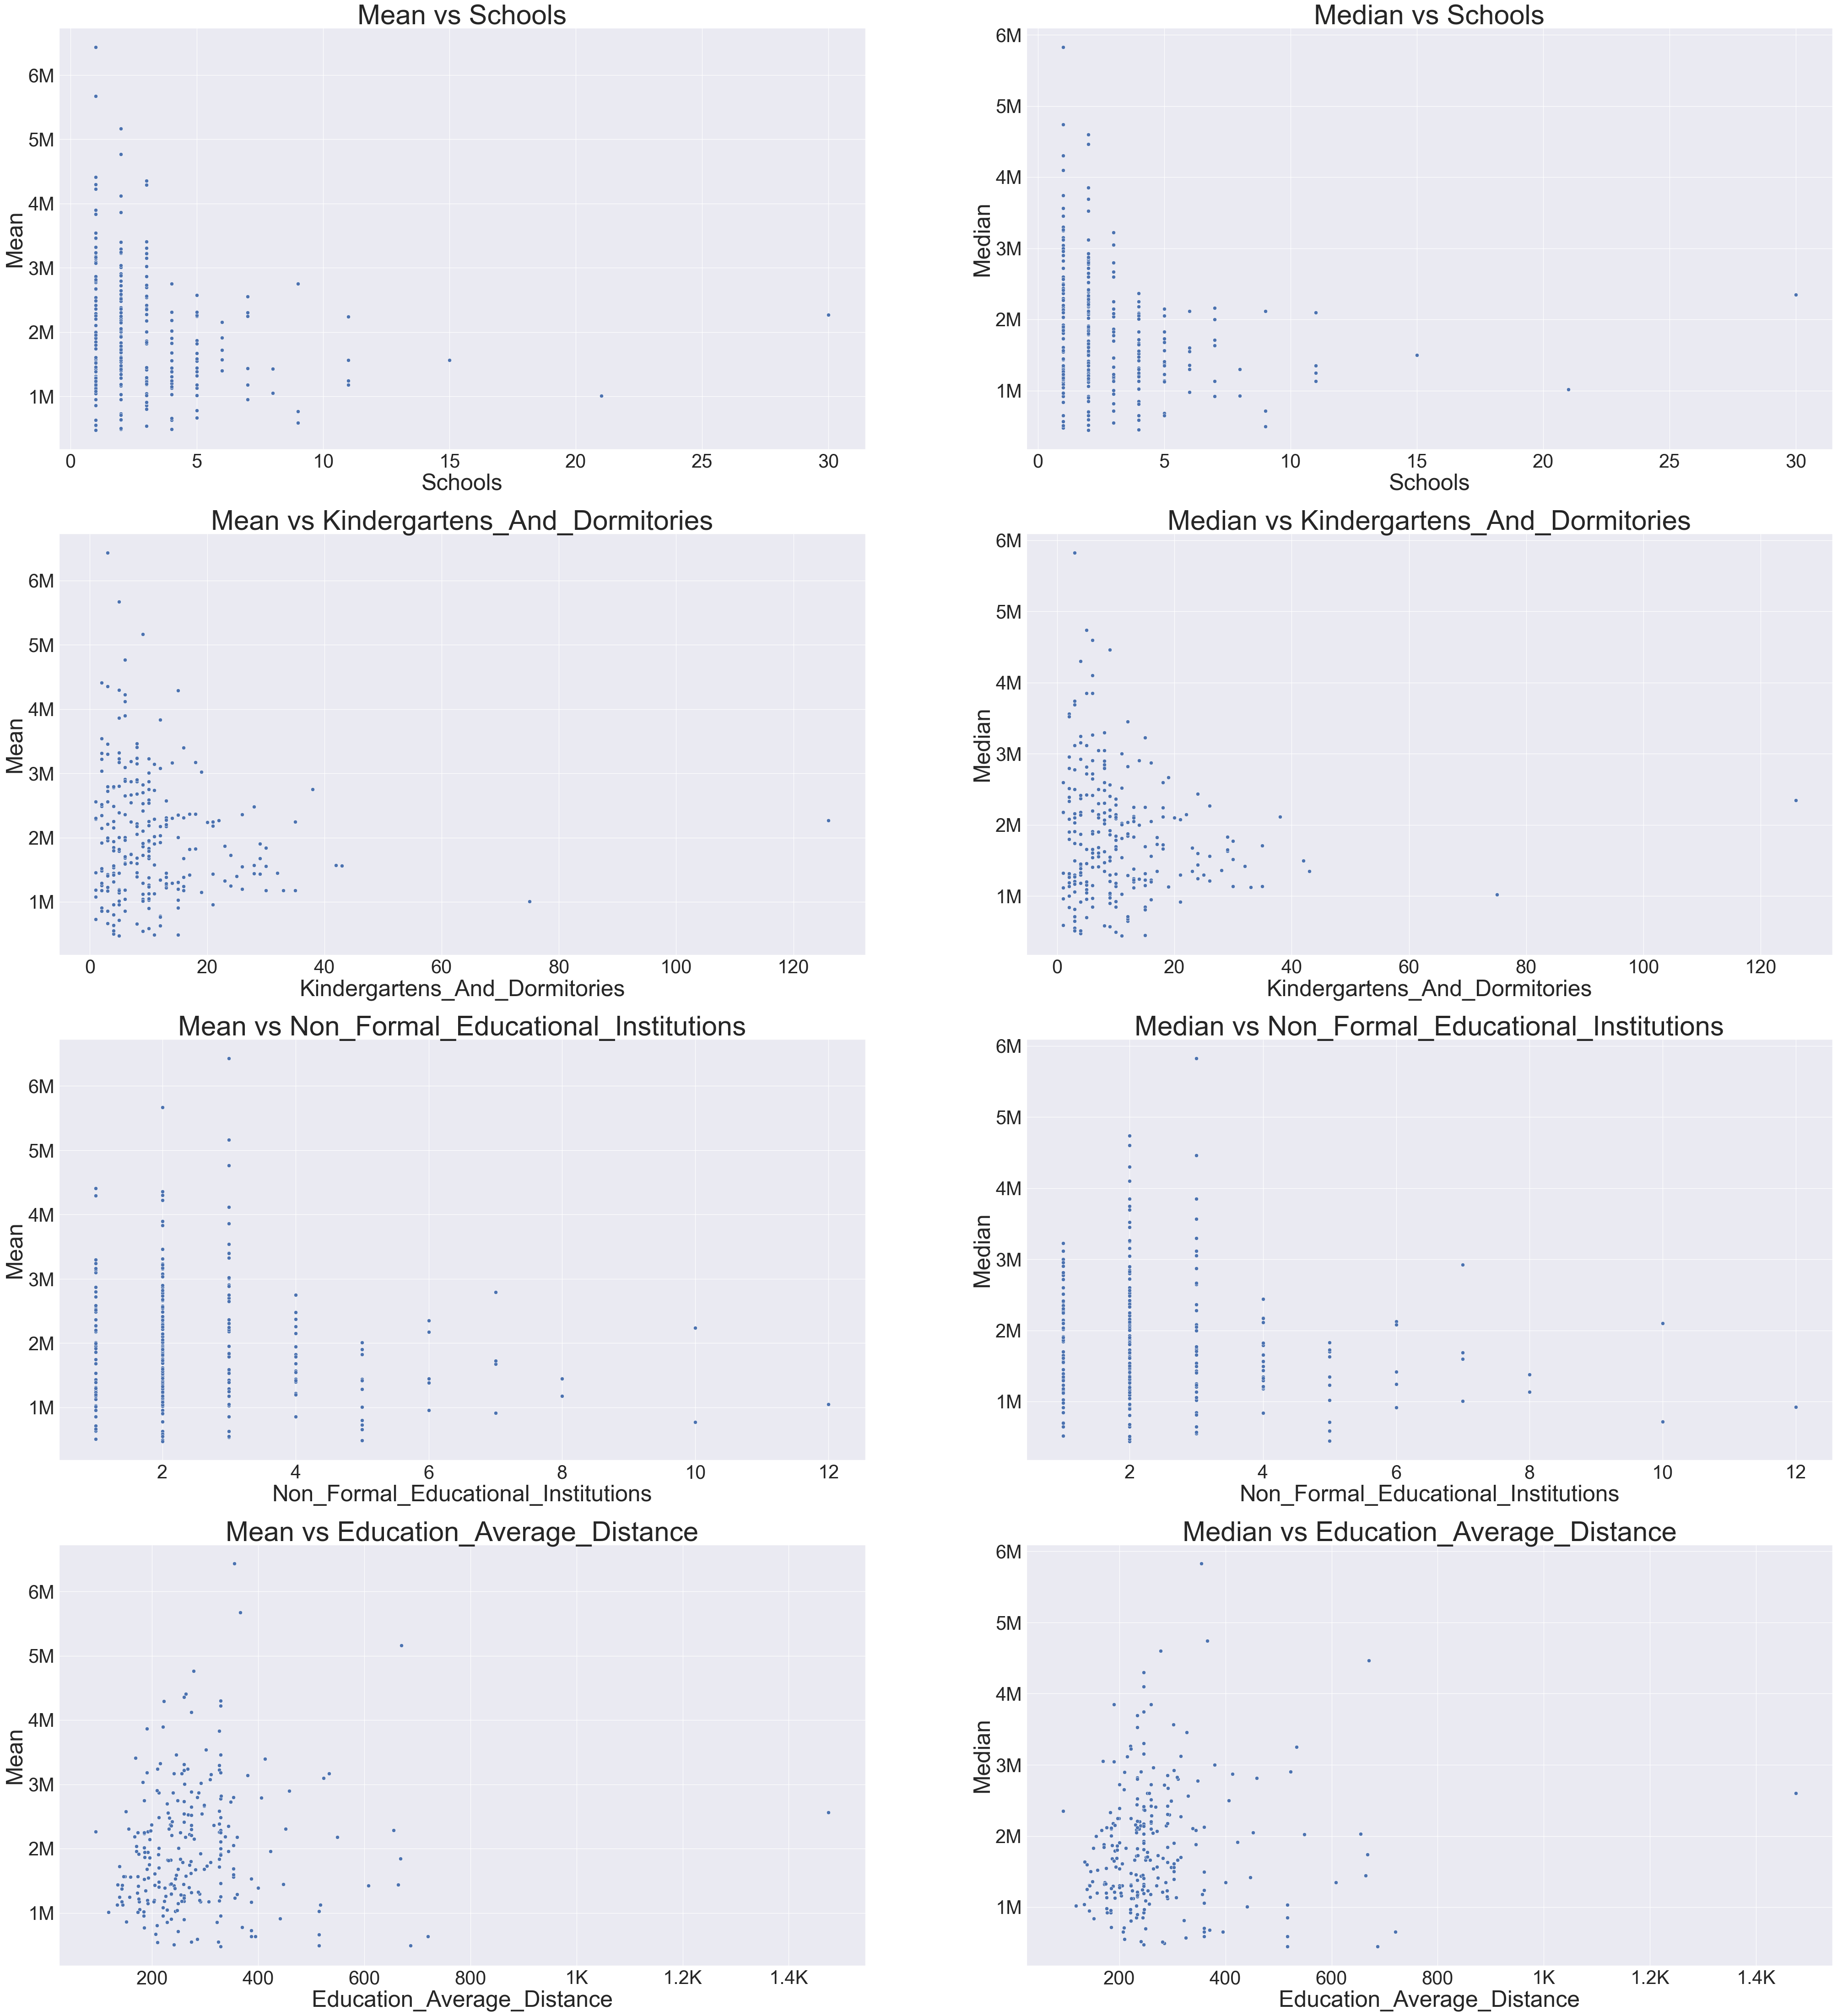

In [74]:
# creating a figure with 4x2 subplots
fig, axs = plt.subplots(4, 2, figsize=(50, 55))

education_list = ['Schools', 'Kindergartens_And_Dormitories',
       'Non_Formal_Educational_Institutions', 'Education_Average_Distance']

# creating a custom formatter to format big numbers
formatter = ticker.FuncFormatter(lambda x, pos: numerize.numerize(x))

for i, education in enumerate(education_list):
    sns.scatterplot(x=education, y='mean', data=nadlan_environmental_mean_df, ax=axs[i][0])
    axs[i][0].set_xlabel(education)
    axs[i][0].set_ylabel('Mean')
    axs[i][0].set_title(f'Mean vs {education}')
    axs[i][0].xaxis.set_major_formatter(formatter)
    axs[i][0].yaxis.set_major_formatter(formatter)

    sns.scatterplot(x=education, y='median', data=nadlan_environmental_median_df, ax=axs[i][1])
    axs[i][1].set_xlabel(education)
    axs[i][1].set_ylabel('Median')
    axs[i][1].set_title(f'Median vs {education}')
    axs[i][1].xaxis.set_major_formatter(formatter)
    axs[i][1].yaxis.set_major_formatter(formatter)

**Mean/Median vs Green Areas:**

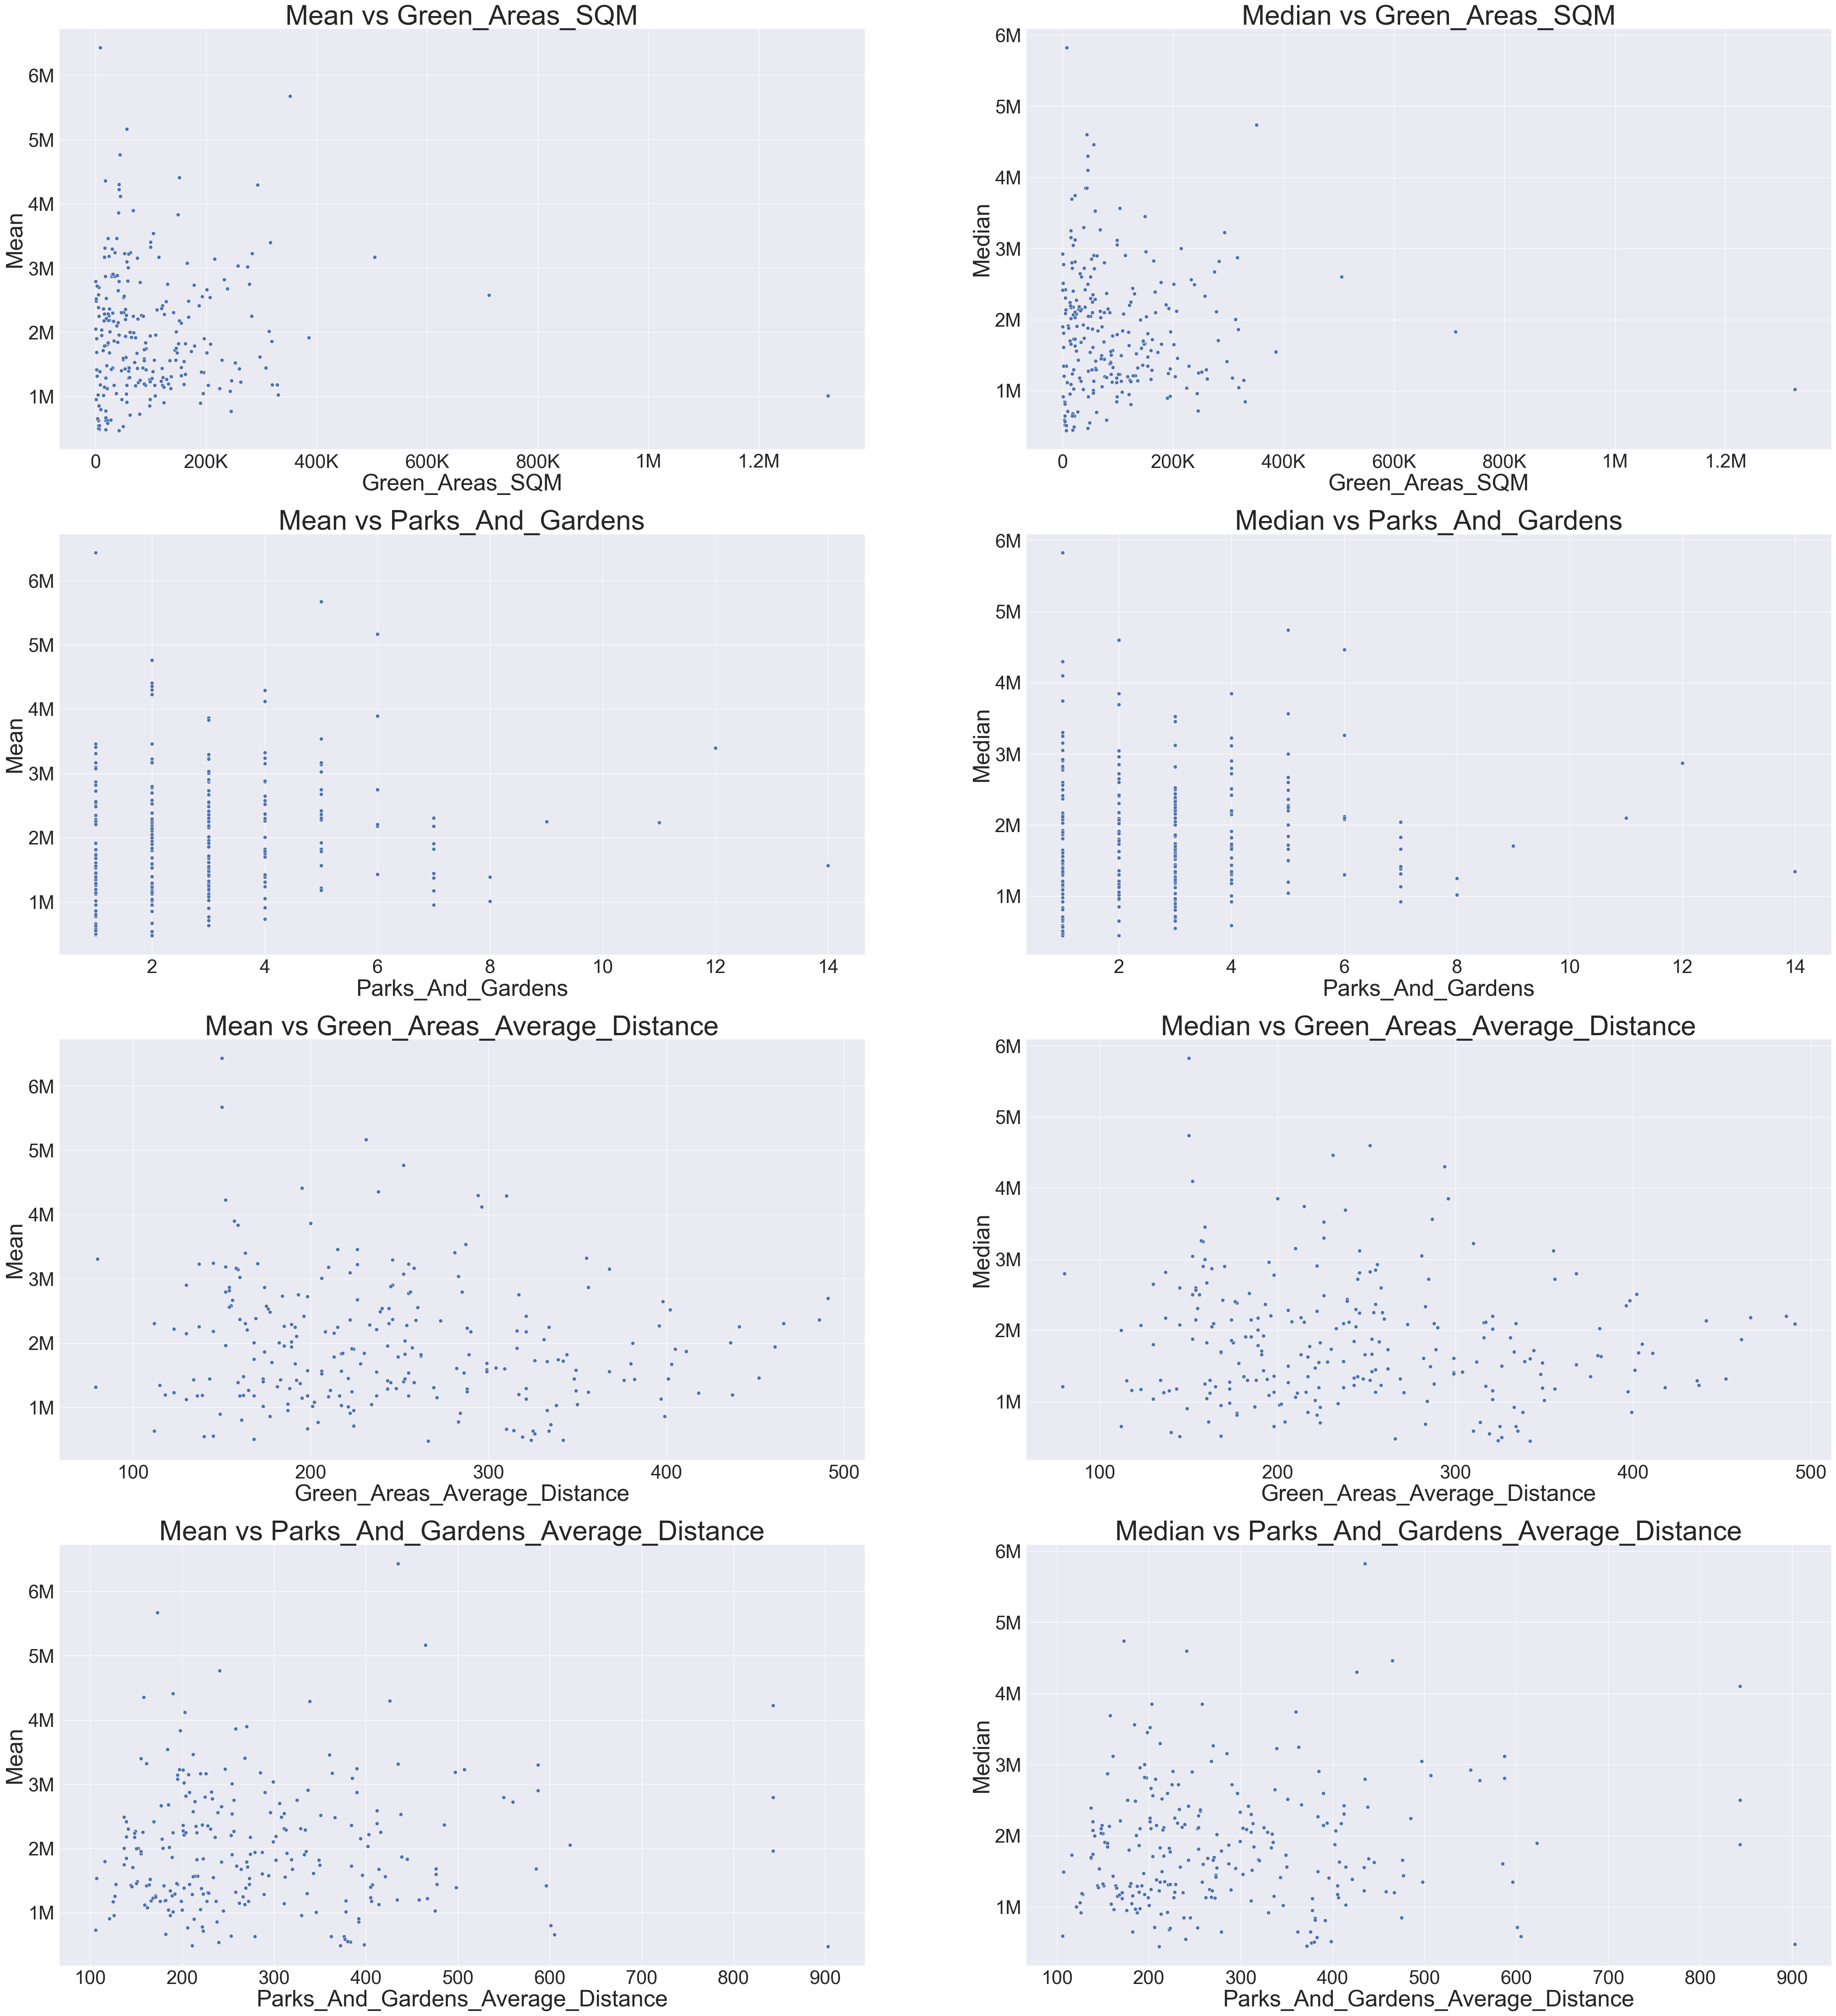

In [75]:
# creating a figure with 4x2 subplots
fig, axs = plt.subplots(4, 2, figsize=(50, 55))

green_list = ['Green_Areas_SQM', 'Parks_And_Gardens', 'Green_Areas_Average_Distance',
       'Parks_And_Gardens_Average_Distance']

# creating a custom formatter to format big numbers
formatter = ticker.FuncFormatter(lambda x, pos: numerize.numerize(x))

for i, green in enumerate(green_list):
    sns.scatterplot(x=green, y='mean', data=nadlan_environmental_mean_df, ax=axs[i][0])
    axs[i][0].set_xlabel(green)
    axs[i][0].set_ylabel('Mean')
    axs[i][0].set_title(f'Mean vs {green}')
    axs[i][0].xaxis.set_major_formatter(formatter)
    axs[i][0].yaxis.set_major_formatter(formatter)

    sns.scatterplot(x=green, y='median', data=nadlan_environmental_median_df, ax=axs[i][1])
    axs[i][1].set_xlabel(green)
    axs[i][1].set_ylabel('Median')
    axs[i][1].set_title(f'Median vs {green}')
    axs[i][1].xaxis.set_major_formatter(formatter)
    axs[i][1].yaxis.set_major_formatter(formatter)

**Mean/Median vs Public Buildings:**

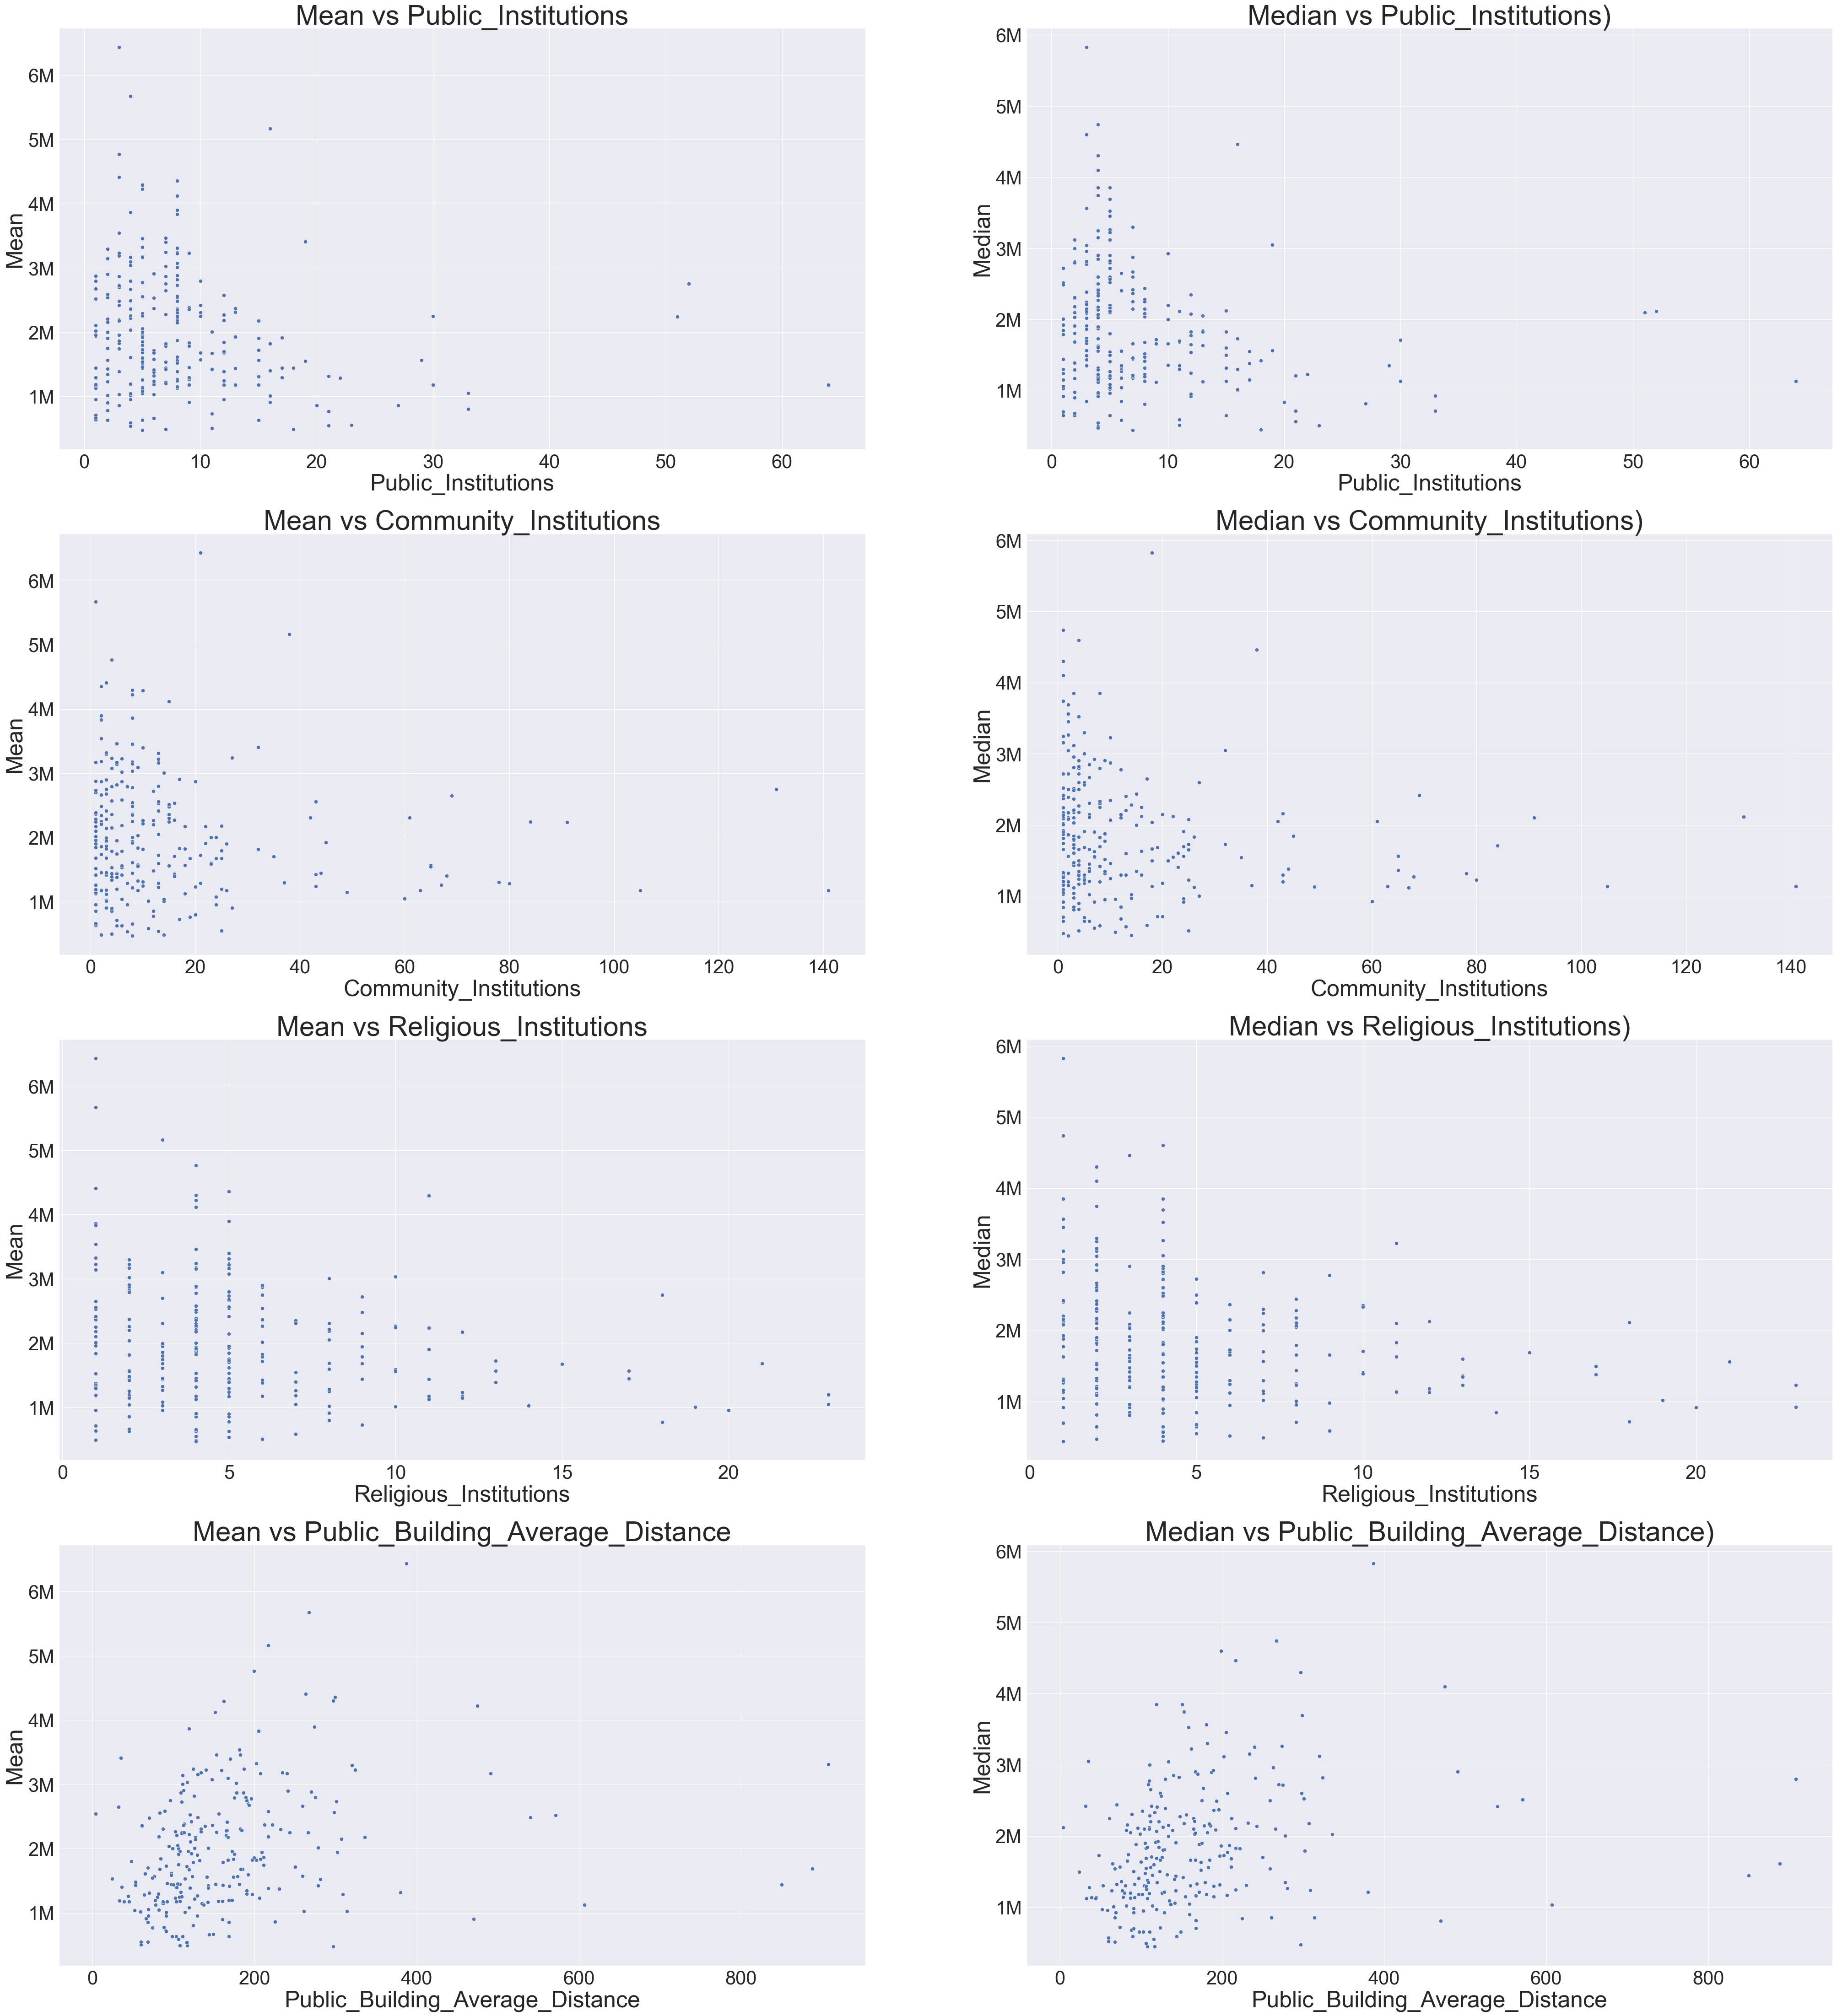

In [76]:
# creating a figure with 4x2 subplots
fig, axs = plt.subplots(4, 2, figsize=(50, 55))

public_list = ['Public_Institutions',
       'Community_Institutions', 'Religious_Institutions',
       'Public_Building_Average_Distance']

# creating a custom formatter to format big numbers
formatter = ticker.FuncFormatter(lambda x, pos: numerize.numerize(x))

for i, public in enumerate(public_list):
    sns.scatterplot(x=public, y='mean', data=nadlan_environmental_mean_df, ax=axs[i][0])
    axs[i][0].set_xlabel(public)
    axs[i][0].set_ylabel('Mean')
    axs[i][0].set_title(f'Mean vs {public}')
    axs[i][0].xaxis.set_major_formatter(formatter)
    axs[i][0].yaxis.set_major_formatter(formatter)

    sns.scatterplot(x=public, y='median', data=nadlan_environmental_median_df, ax=axs[i][1])
    axs[i][1].set_xlabel(public)
    axs[i][1].set_ylabel('Median')
    axs[i][1].set_title(f'Median vs {public})')
    axs[i][1].xaxis.set_major_formatter(formatter)
    axs[i][1].yaxis.set_major_formatter(formatter)

# Step 2: Environment Dataset Conclusion:

## What Have We Done:
1. We calculated the means and medians of the prices in each neighborhood in each city so that we could examine statistical relationships between them and the environmental data of the neighborhoods
2. We visually examined the relationship between different environmental data of neighborhoods in the cities we collected, and the means and medians of housing prices in those neighborhoods.
    + Using Heatmaps
    + Using Scatter Plots

## What Have We Learned:
In comparison to the our main dataset, we were able to discover few relationships between the quantitative and numerical variables in the surroundings of the neighborhoods, and the average and median prices of housing units in those neighborhoods.


Most of the connections we found were between the prices and the distances of attractive destinations around the neighborhoods, such as green spaces, parks, and places of commerce.
As for the others, less.


We conclude that there might be 2 reasons for that:
1. The mean and median prices of the housing units were composed of prices spread over many years, while the environmental data we collected is current as of 2020, therefore, it can be concluded that the prices of previous years do not really faithfully reflect the environmental data we have. Even if we were to perform a test only on prices starting from 2020, we would not be able to make a proper comparison between them and prices below 2020.
2. We think it's probably because we don't have enough different types of environmental data, as this is the only up-to-date environmental data we could get our hands on. If we had information about parking lots, elevators, etc., we might have been able to find more connections in the visual representations we made.